# Step 1: Import Libraries

In [5]:
import pandas as pd

In [5]:
# with open('ChemRxiv.csv', 'r') as file:
#     lines = file.readlines()

# for i in range (len(lines) - 1):
#     lines[i] = lines[i].replace('', ',')
# with open('ChemRxiv.csv', 'w') as file:
#     file.writelines(lines)

# Step 2: Use pandas to read CSV data

In [129]:
chemrxivDf = pd.read_csv('ChemRxiv.csv', sep='\s+') # sep='\s+' is for whitespace separated values

# Concatenate split columns back together
chemrxivDf.columns = [
    ' '.join(chemrxivDf.columns[i:i+4]) # join 15 to 15+4
    if i == 15 else chemrxivDf.columns[i] # otherwise keep the column name
    for i in range(len(chemrxivDf.columns)) # for each range of total num of columns
]

# Drop the specified columns
columns_to_remove = ['-', 'Arrhenius', 'fits)']
chemrxivDf = chemrxivDf.drop(columns=columns_to_remove)

In [130]:
# Display the dataset
print(chemrxivDf.head())

   Sample      Salt   VC        EC       EMC     C1-0C    C2-10C    C3-20C  \
0       1  0.053197  0.0  0.318338  0.628464 -2.303717 -2.213647 -2.138183   
1       2  0.061109  0.0  0.315664  0.623228 -2.293543 -2.199740 -2.120343   
2       3  0.064980  0.0  0.314366  0.620654 -2.293145 -2.205565 -2.120255   
3       4  0.079188  0.0  0.309541  0.611272 -2.312285 -2.208360 -2.126960   
4       5  0.094764  0.0  0.304009  0.601227 -2.319545 -2.217755 -2.131715   

     C4-30C    C5-40C    C6-50C    C7-60C        S0        S1        S2  \
0 -2.068923 -2.005360 -1.947687 -1.886993 -2.301608 -0.664652 -0.061665   
1 -2.056800 -1.989620 -1.921433 -1.856203 -2.289248 -0.652838 -0.003456   
2 -2.034390 -1.965930 -1.894800 -1.835285 -2.295247 -0.718122 -0.027725   
3 -2.047955 -1.978495 -1.918330 -1.880780 -2.312920 -0.824820 -0.246872   
4 -2.024845 -1.987385 -1.896325 -1.835220 -2.319161 -0.795042 -0.098066   

   log(eror - Arrhenius fits)  
0                   -6.039789  
1               

# How many columns and rows are there?

In [131]:
rows, columns = chemrxivDf.shape
print(f'The dataset has {rows} rows and {columns} columns')

The dataset has 51 rows and 16 columns


# What are columns names and their types

In [132]:
ColumnsHeader = chemrxivDf.columns[:]
for col in ColumnsHeader:
    print(f"name: {col}, dtype: {chemrxivDf[col].dtype}")

name: Sample, dtype: int64
name: Salt, dtype: float64
name: VC, dtype: float64
name: EC, dtype: float64
name: EMC, dtype: float64
name: C1-0C, dtype: float64
name: C2-10C, dtype: float64
name: C3-20C, dtype: float64
name: C4-30C, dtype: float64
name: C5-40C, dtype: float64
name: C6-50C, dtype: float64
name: C7-60C, dtype: float64
name: S0, dtype: float64
name: S1, dtype: float64
name: S2, dtype: float64
name: log(eror - Arrhenius fits), dtype: float64


# Step 3: Data Cleaning

In [133]:
# Check duplicates in a data frame
chemrxivDf.duplicated().sum()

0

In [134]:
# View the Duplicate Records
duplicates = chemrxivDf.duplicated()

chemrxivDf[duplicates]

,Sample,Salt,VC,EC,EMC,C1-0C,C2-10C,C3-20C,C4-30C,C5-40C,C6-50C,C7-60C,S0,S1,S2,log(eror - Arrhenius fits)


In [135]:
# Delete Duplicate rows
chemrxivDf.drop_duplicates(inplace=True)

In [136]:
# Get the shape of chemrxiv data
chemrxivDf.shape

(51, 16)

## 2. Check if there are any outliers in the data and remove outliers

### 2.1 Library

In [124]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 2.2 Using boxplots to check outliers in the data

In [148]:
# Drop column Sample
chemrxivDfWithoutSample = chemrxivDf.drop(columns=['Sample'])

<Axes: >

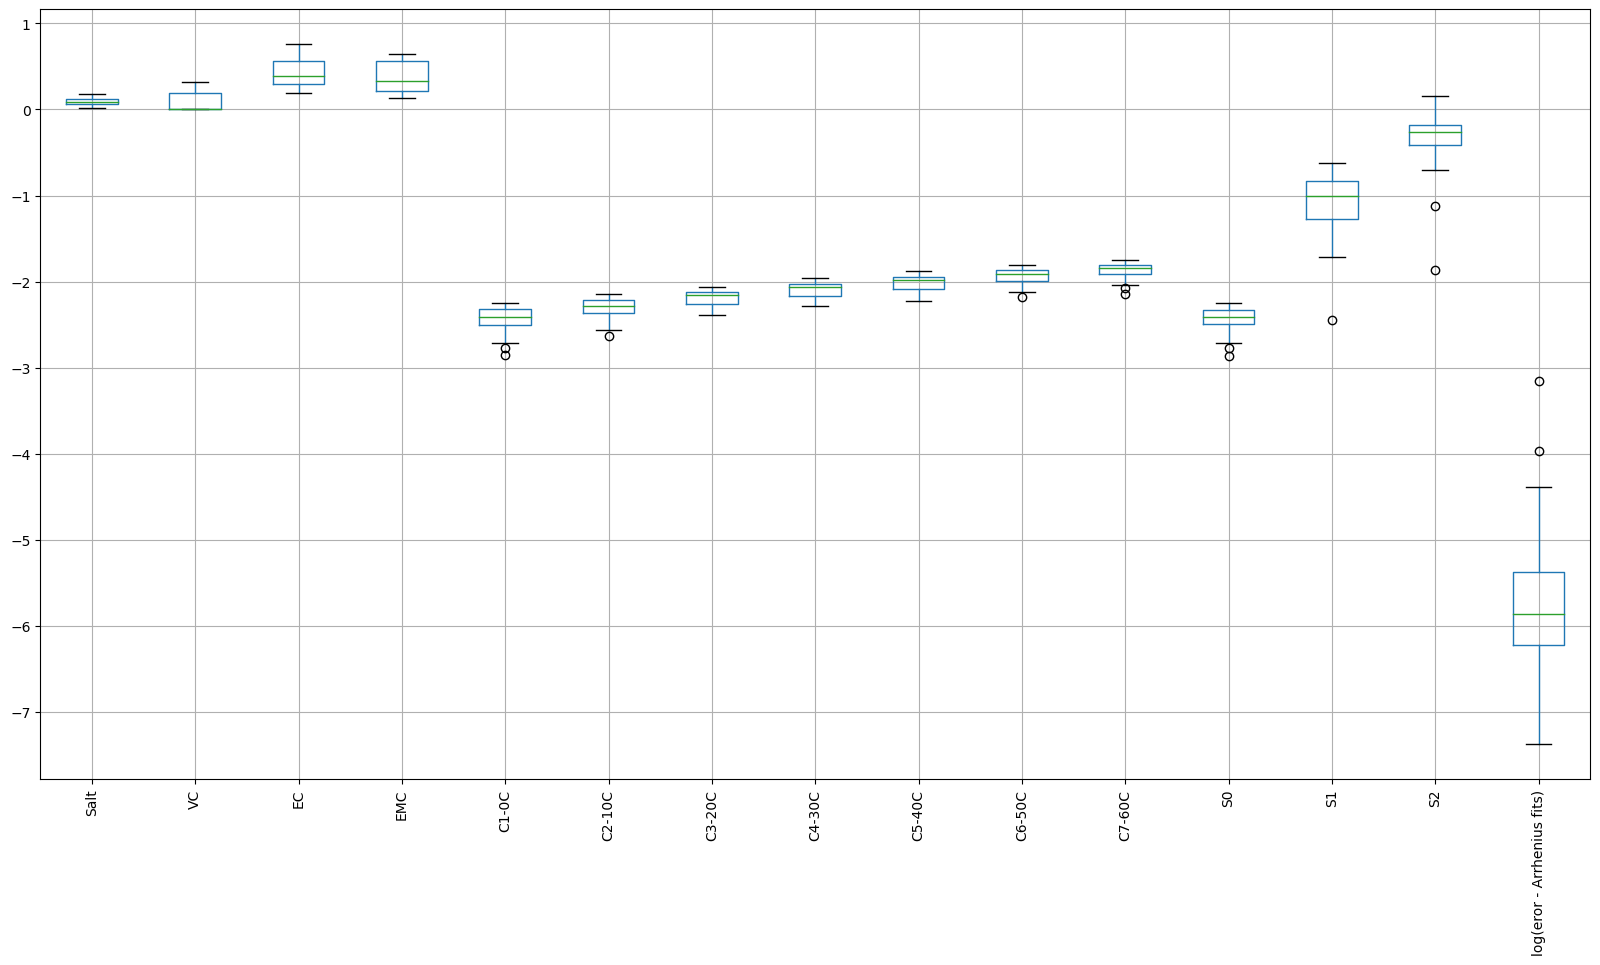

In [149]:
# Create a boxplot for all the continuous features
chemrxivDfWithoutSample.boxplot(column=chemrxivDfWithoutSample.columns.tolist(), rot = 90, figsize=(20, 10))

Looking at the plot: C1-0C, C2-10C, C6-50C, C7-60C, S0, S1, S2, log(eror - Arrhenius fits) have outliers and we need to treat those outliers

### Working with outliers: Correcting Removing

In [173]:
chemrxivDfOutliersWithoutSample = pd.DataFrame(chemrxivDfWithoutSample.loc[:,])

# Calculate IQR
Q1 = chemrxivDfOutliersWithoutSample.quantile(0.25)
Q3 = chemrxivDfOutliersWithoutSample.quantile(0.75)
IQR = Q3 - Q1

print(IQR)

Salt                          0.061597
VC                            0.190897
EC                            0.274648
EMC                           0.353734
C1-0C                         0.176891
C2-10C                        0.151511
C3-20C                        0.144757
C4-30C                        0.138564
C5-40C                        0.130833
C6-50C                        0.117089
C7-60C                        0.107414
S0                            0.171052
S1                            0.445677
S2                            0.234724
log(eror - Arrhenius fits)    0.846345
dtype: float64


#### 1st Way

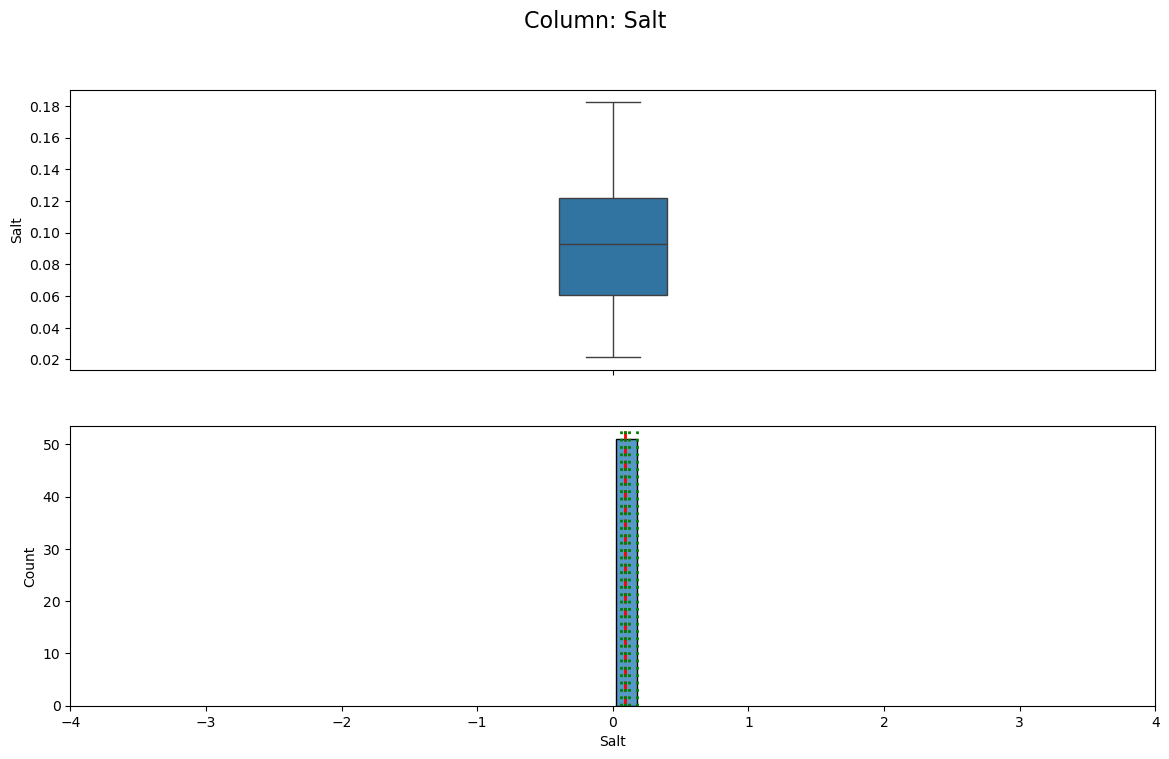

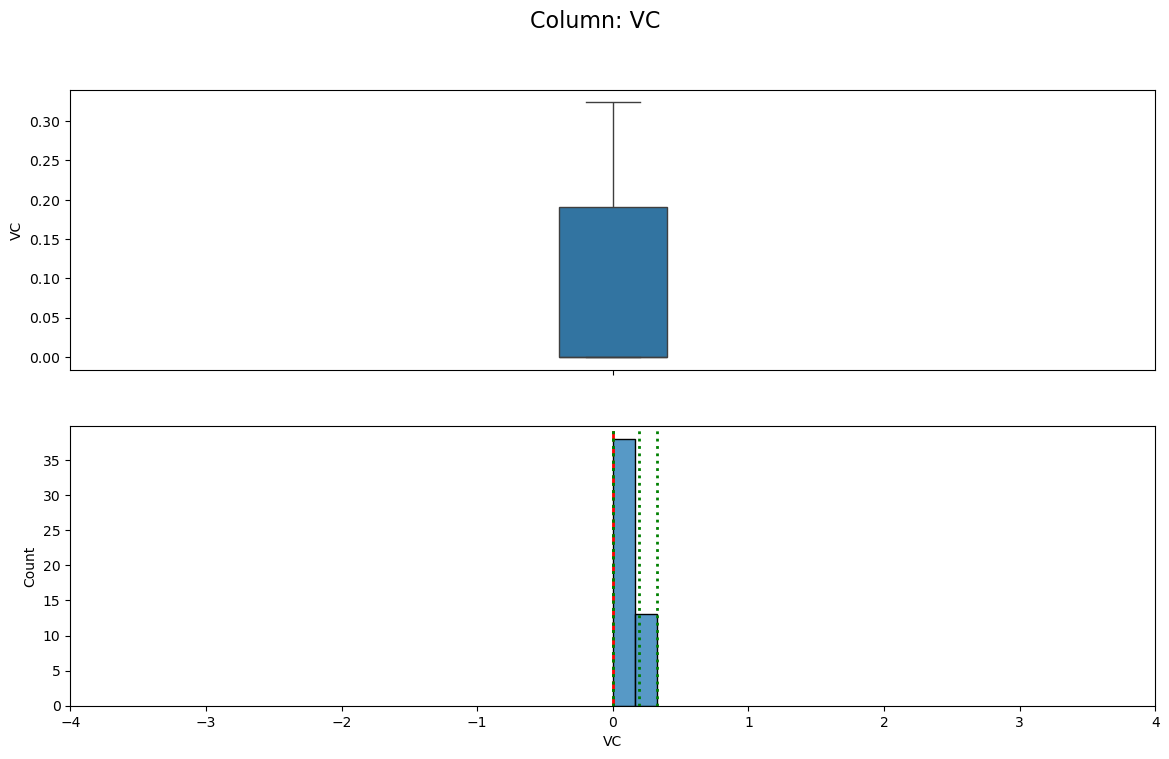

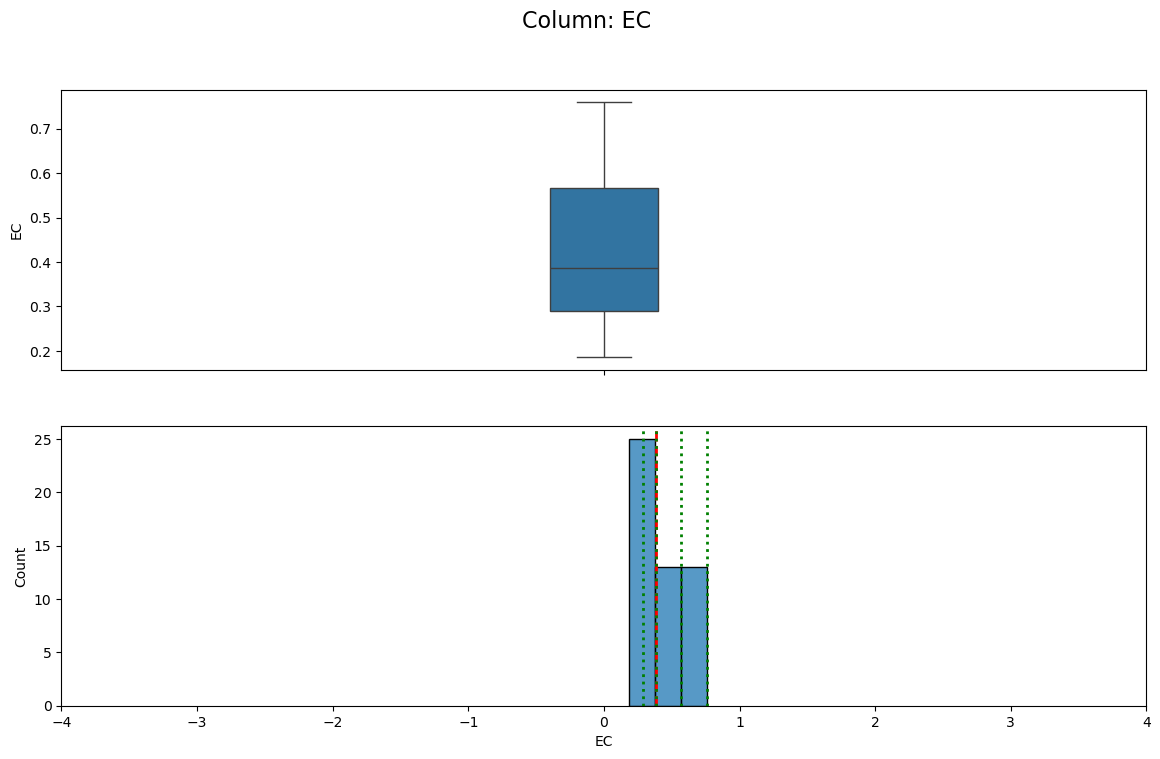

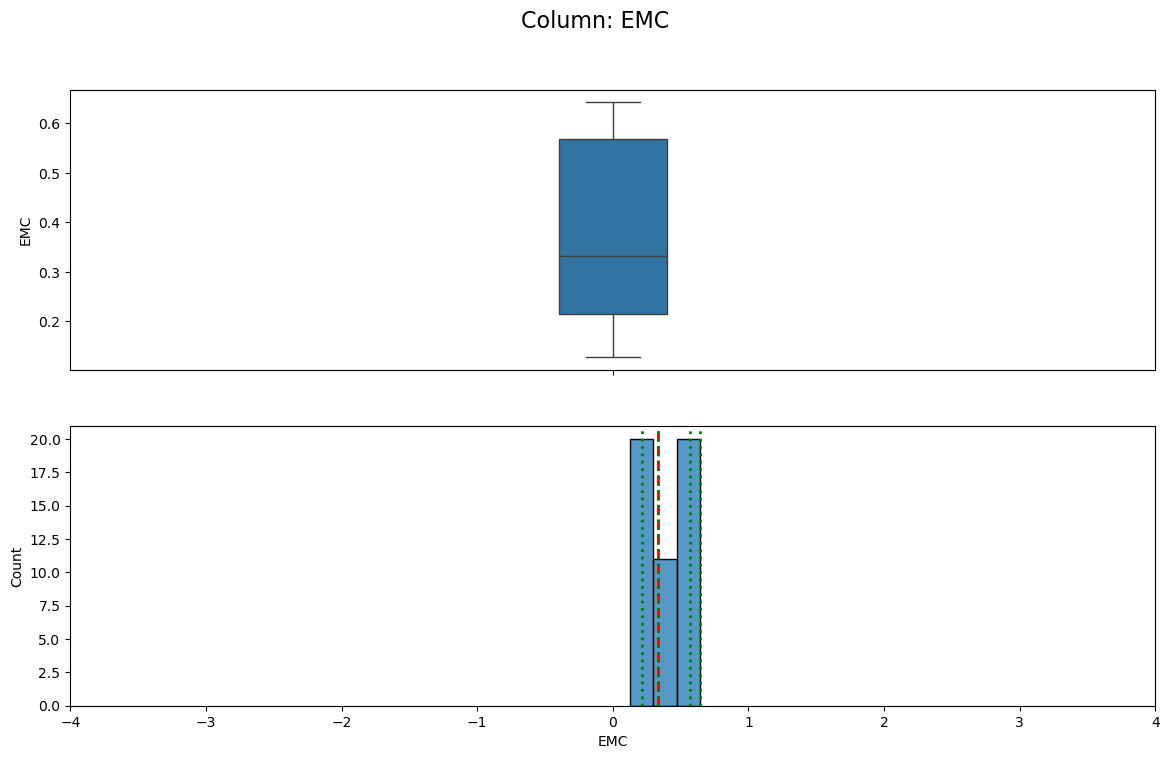

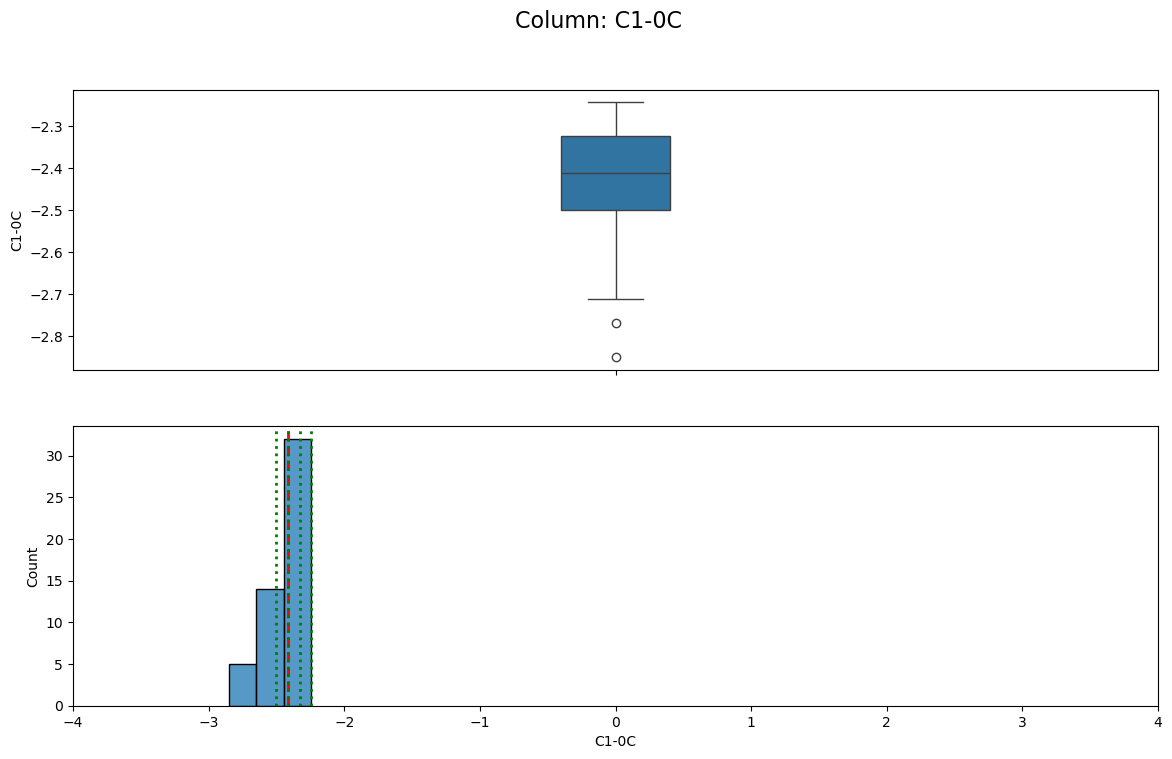

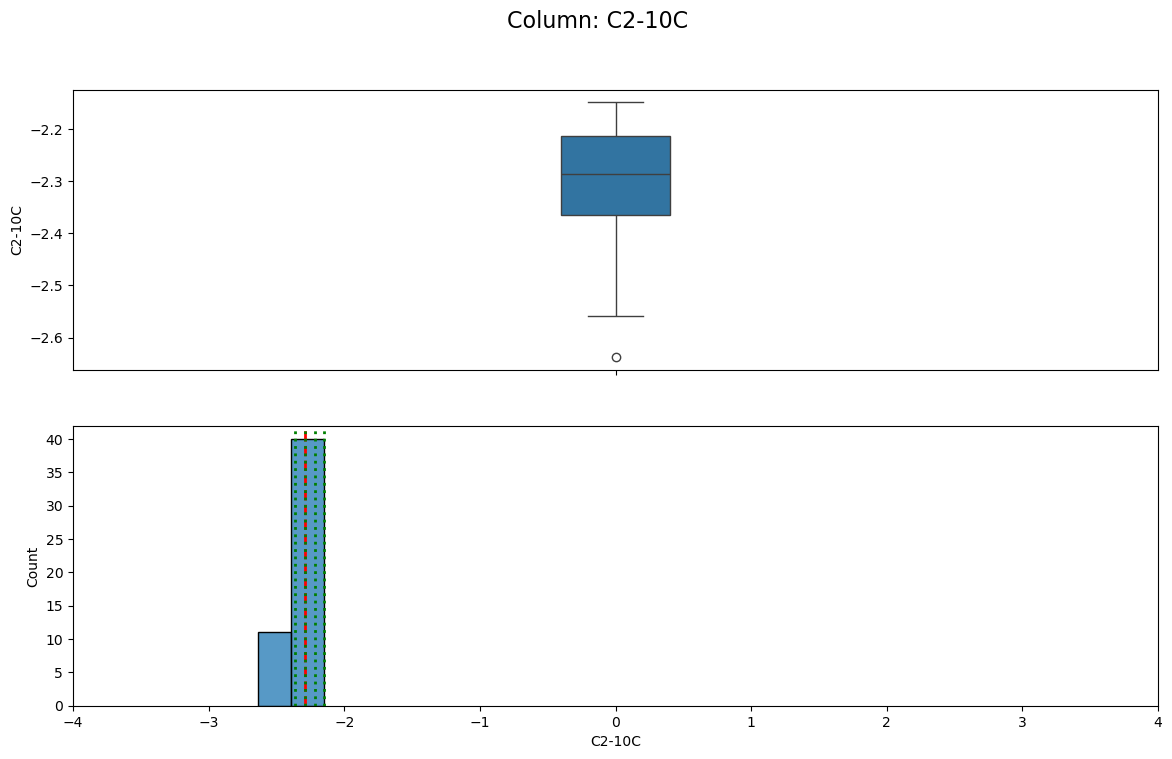

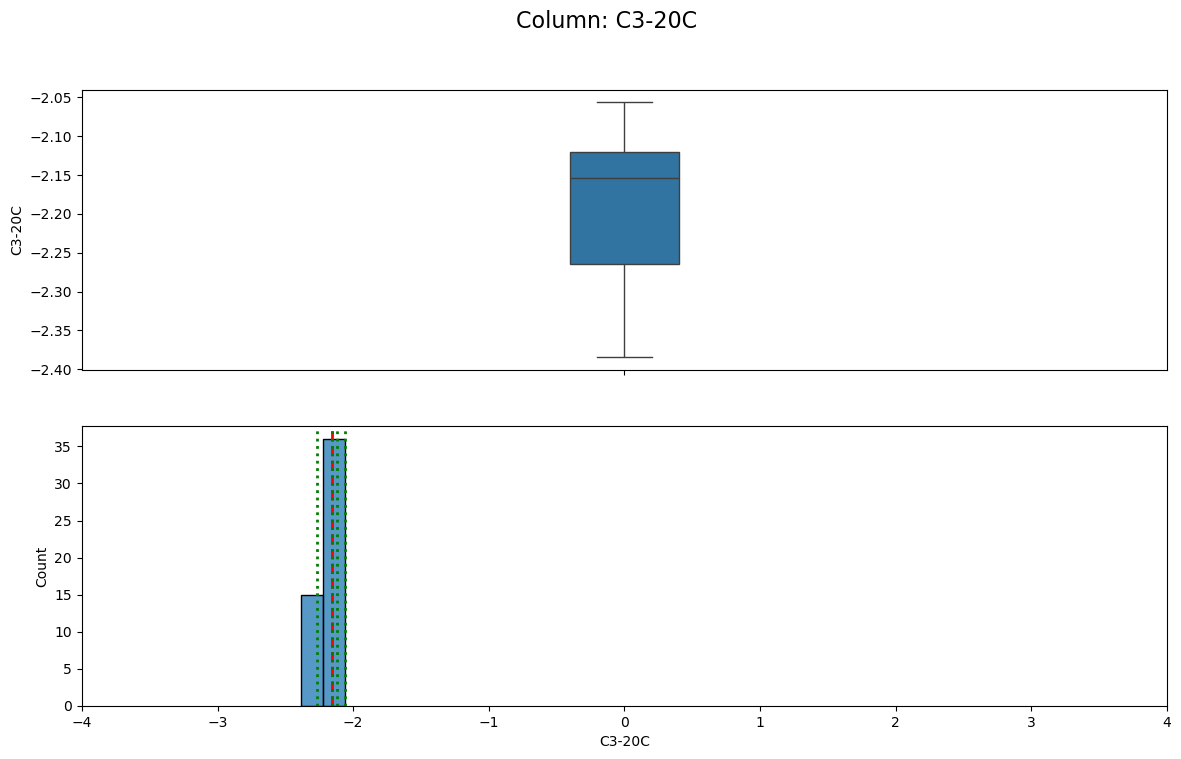

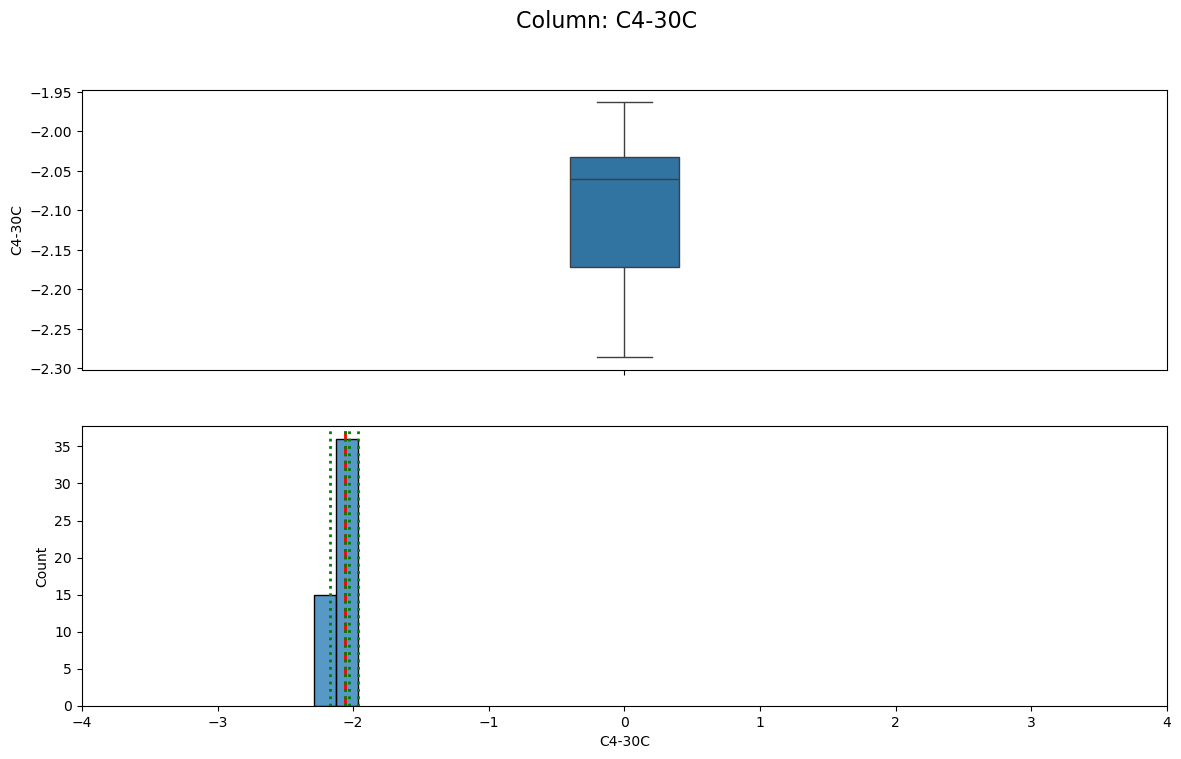

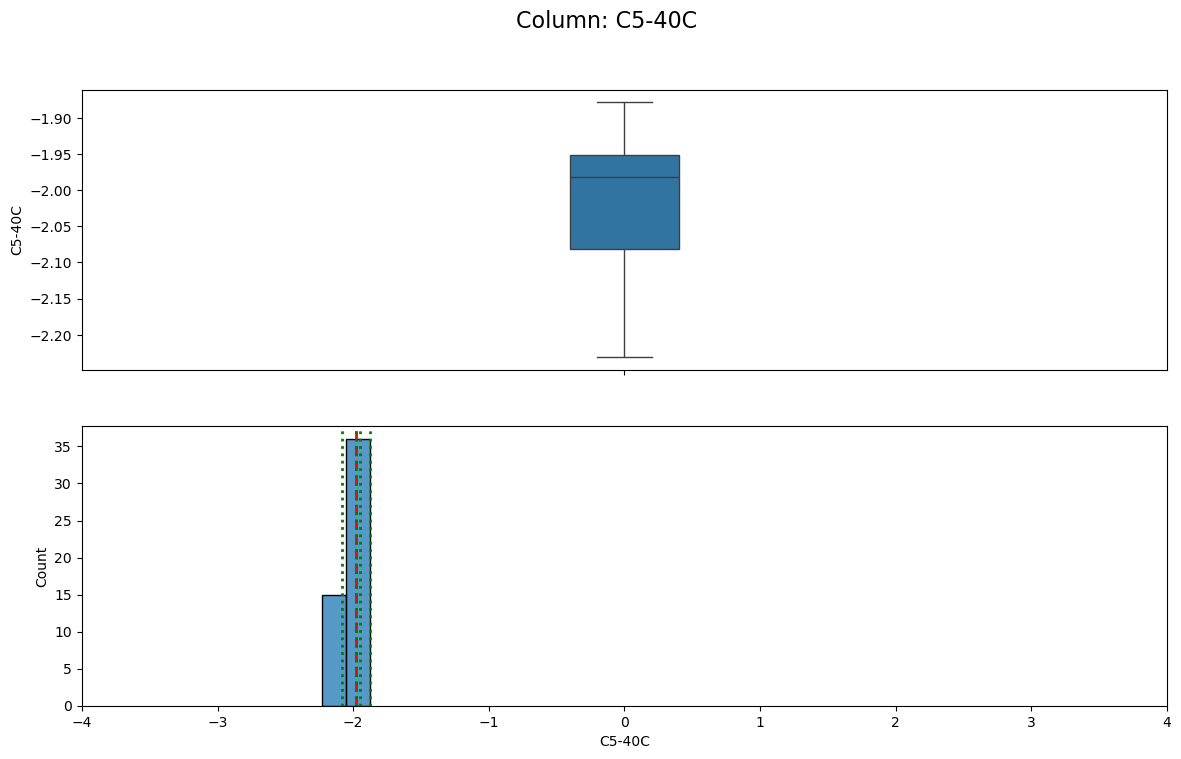

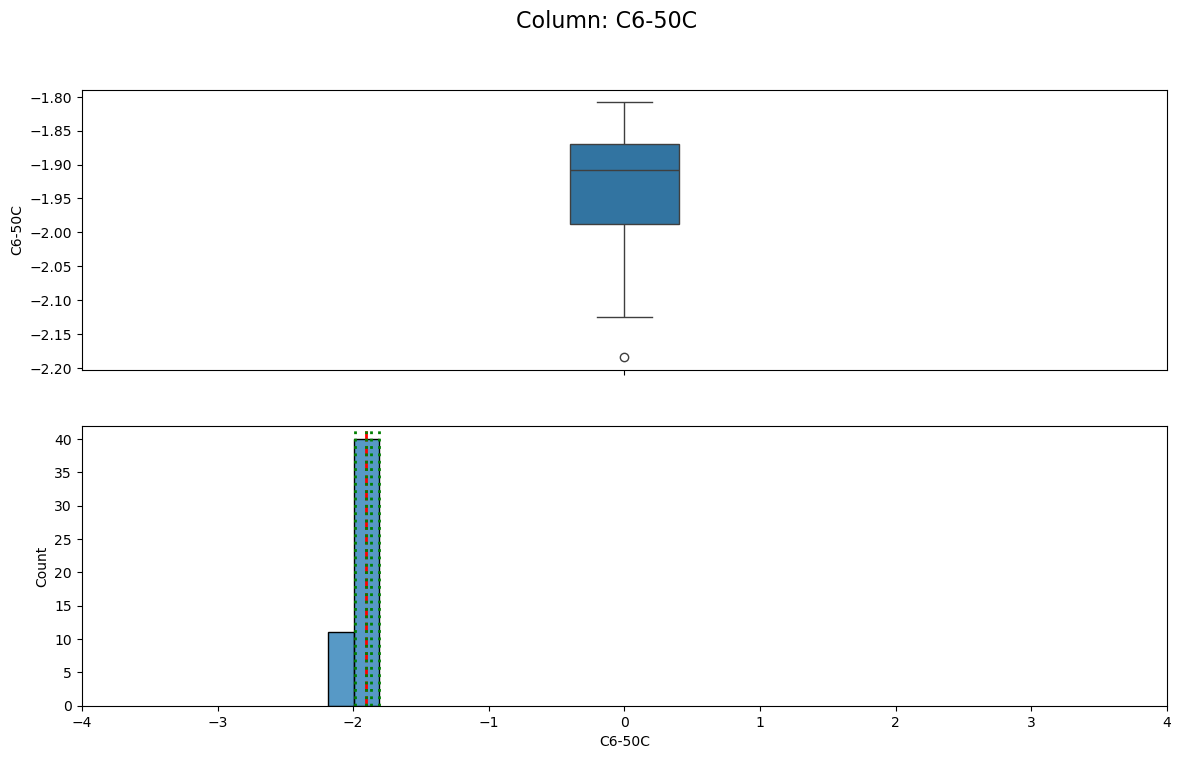

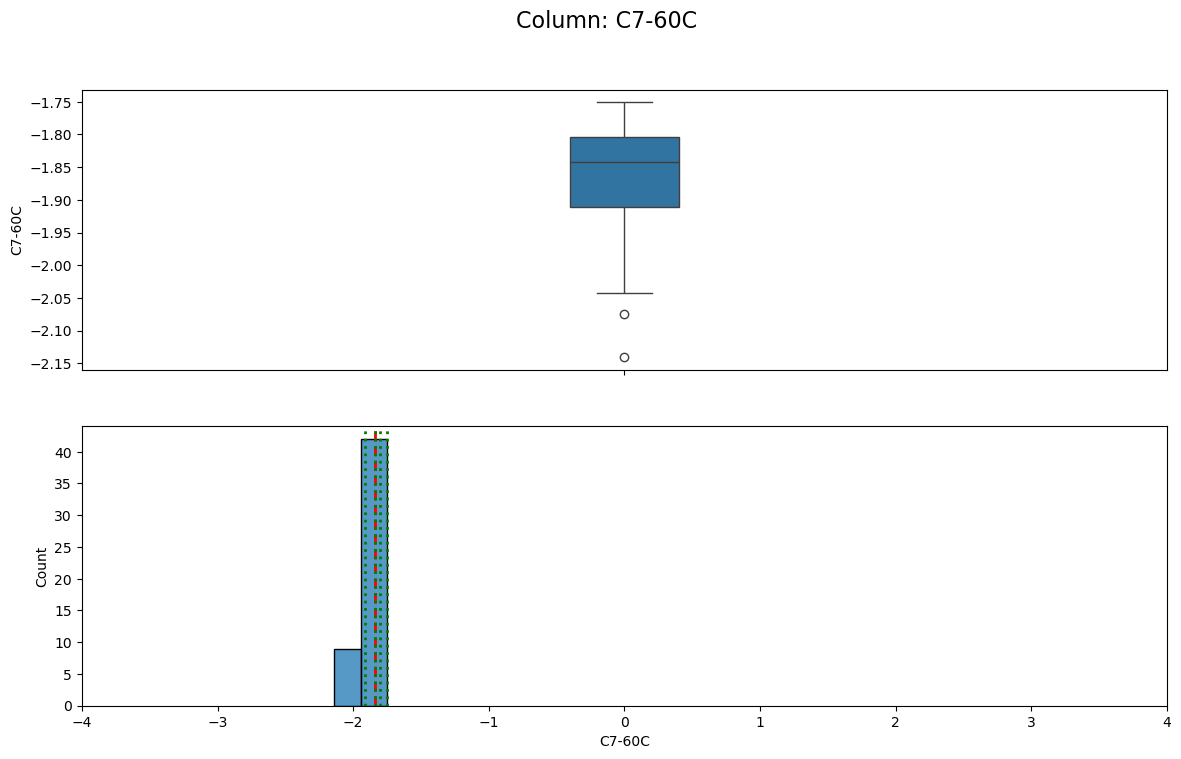

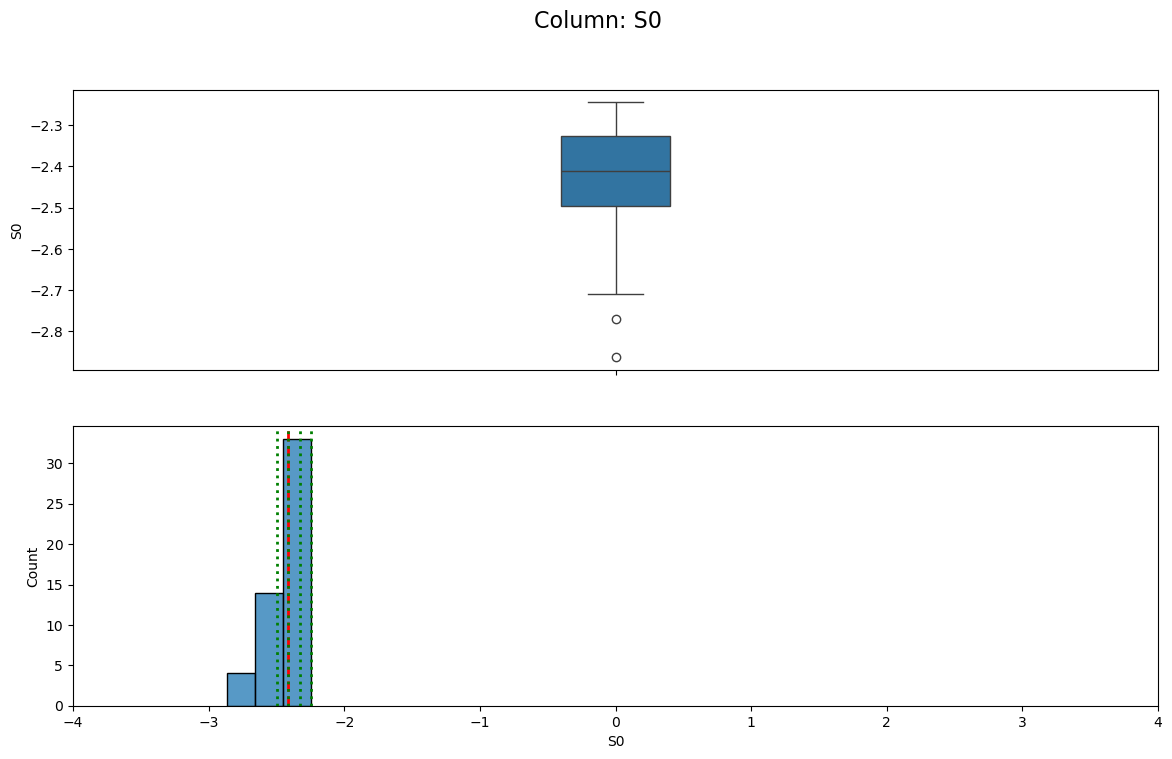

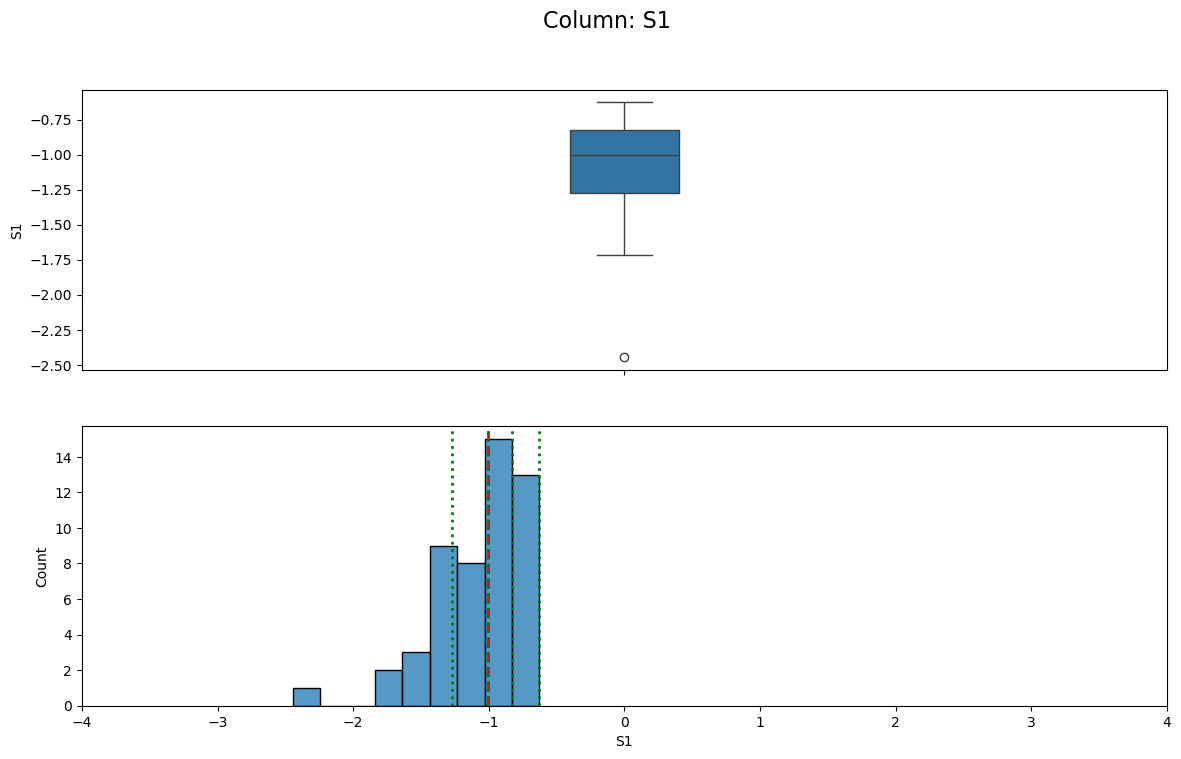

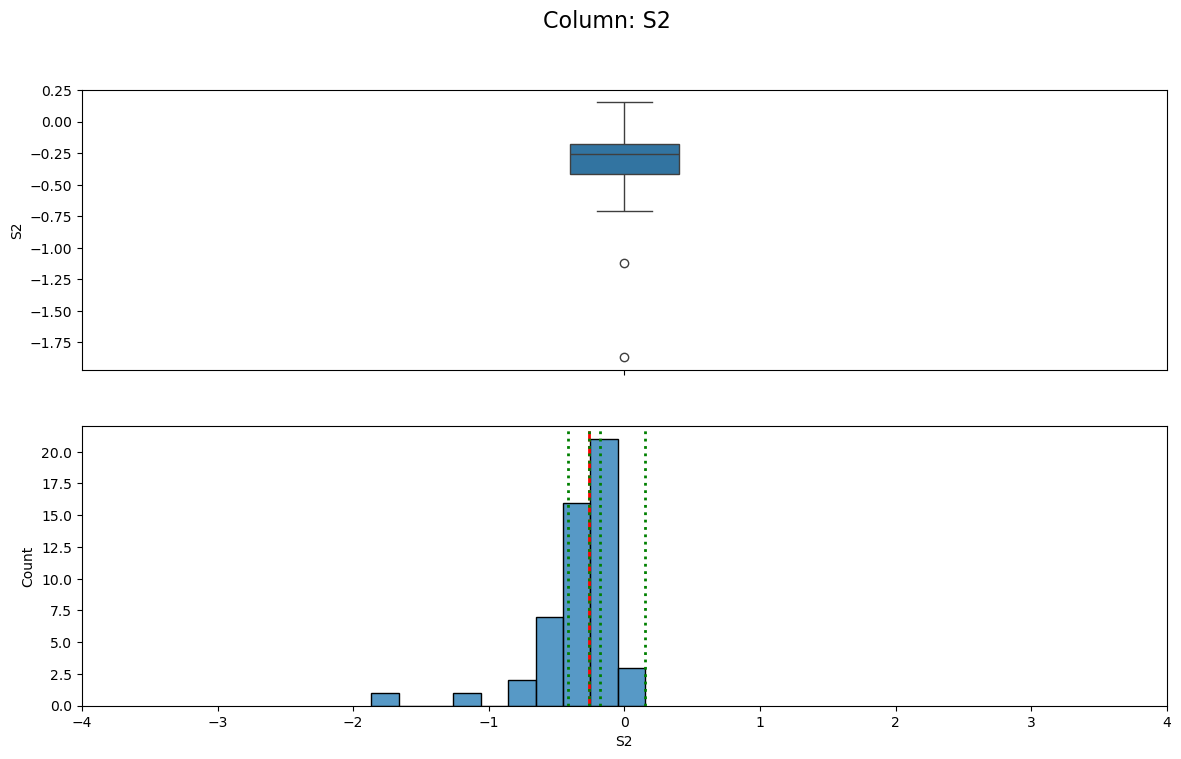

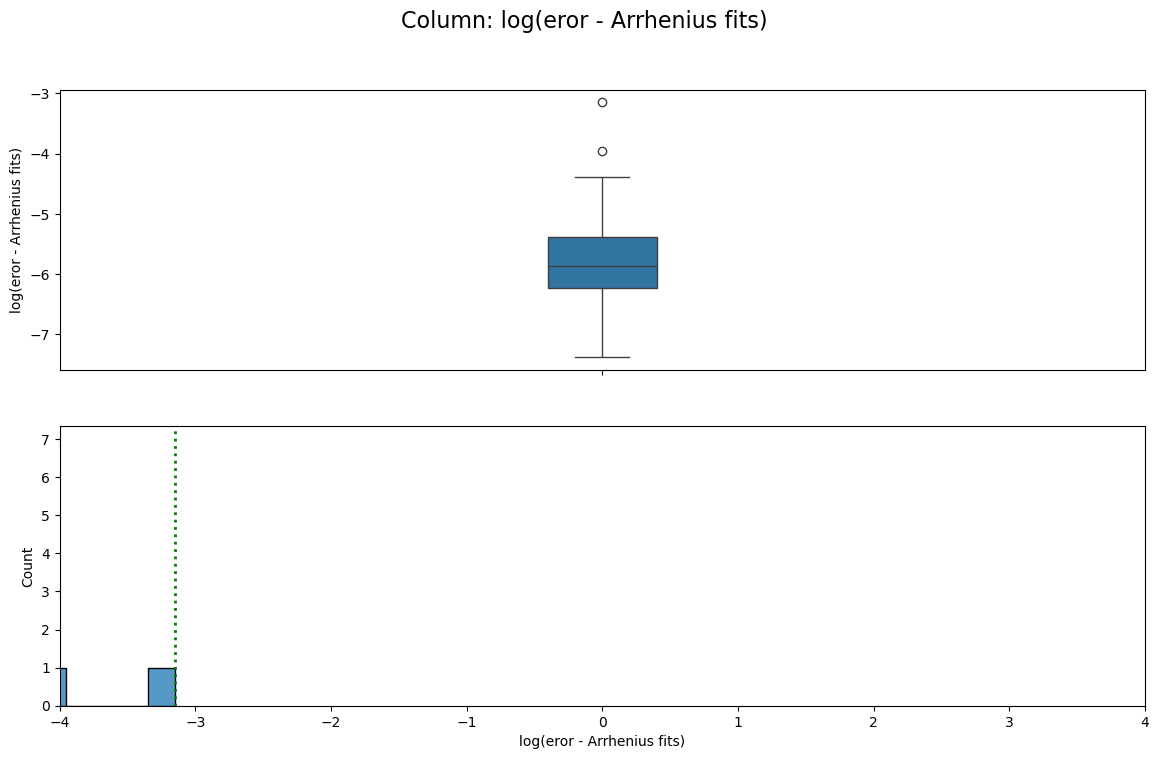

In [171]:
for columnName in chemrxivDfWithoutSample.columns:
    data = chemrxivDfWithoutSample[columnName]
    quartiles = pd.DataFrame(data).quantile([0.25, 0.5, 0.75, 1])[columnName]

    fig, axs = plt.subplots(nrows=2)
    fig.set_size_inches(14, 8)
    fig.suptitle(f'Column: {columnName}', fontsize=16)

    # Boxplot of Normal Distribution
    plot1 = sns.boxplot(data, ax=axs[0])
    plot1.set(xlim=(-4, 4))

    # Normal Distribution
    plot2 = sns.histplot(data, ax=axs[1], binwidth=0.2)
    plot2.set(xlim=(-4, 4))

    # Median Line
    axs[1].axvline(np.median(data), color='r', linestyle='dashed', linewidth=2)

    for q in quartiles:
        # Quartile lines
        axs[1].axvline(q, color='g', linestyle='dotted', linewidth=2)

    plt.show()

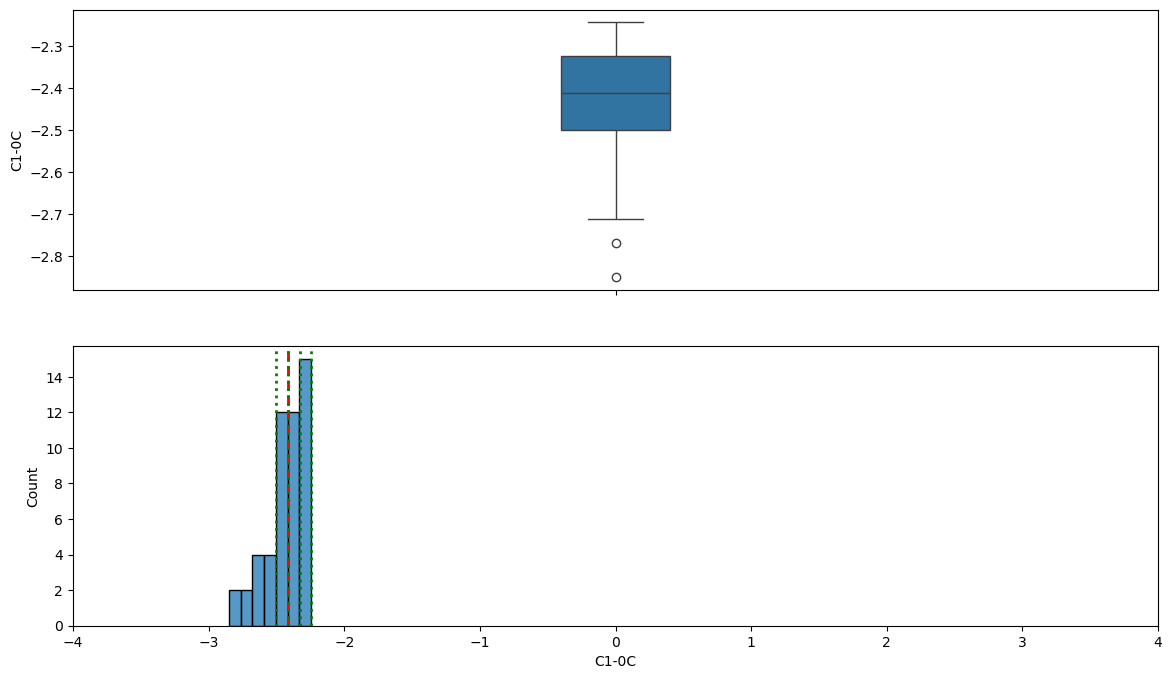

In [164]:
# normal = np.random.normal(loc=0, scale=1, size=1000)
columnName = 'C1-0C'
data=chemrxivDfWithoutSample[columnName]
quartiles = pd.DataFrame(data).quantile([0.25, 0.5, 0.75, 1])[columnName]

fig, axs = plt.subplots(nrows=2)
fig.set_size_inches(14, 8)

# Boxplot of Normal Distribution
plot1 = sns.boxplot(data, ax=axs[0])
plot1.set(xlim=(-4, 4))

# Normal Distribution
plot2 = sns.histplot(data, ax=axs[1])
plot2.set(xlim=(-4, 4))

# Median Line
plt.axvline(np.median(data), color='r', linestyle='dashed', linewidth=2)

for i, q in enumerate(quartiles):
    # Quartile i line
    plt.axvline(q, color='g', linestyle='dotted', linewidth=2)

#### Working with Outliers: Correcting, Removing (continue)

In [175]:
chemrxivDfOutliersWithoutSample.columns

Index(['Salt', 'VC', 'EC', 'EMC', 'C1-0C', 'C2-10C', 'C3-20C', 'C4-30C',
       'C5-40C', 'C6-50C', 'C7-60C', 'S0', 'S1', 'S2',
       'log(eror - Arrhenius fits)'],
      dtype='object')

In [176]:
# We can use the IQR to remove outliers by keeping only valid values

# Replace every outlier on the upper side by the upper whisker - for each column
for i, j in zip(np.where(chemrxivDfOutliersWithoutSample > Q3 + 1.5 * IQR)[0], 
                np.where(chemrxivDfOutliersWithoutSample > Q3 + 1.5 * IQR)[1]):
    whisker = Q3 + 1.5 * IQR
    chemrxivDfOutliersWithoutSample.iloc[i, j] = whisker[j]

# Replace every outlier on the lower side by the lower whisker - for each column
for i, j in zip(np.where(chemrxivDfOutliersWithoutSample < Q1 - 1.5 * IQR)[0],
                np.where(chemrxivDfOutliersWithoutSample < Q1 - 1.5 * IQR)[1]):
    whisker = Q1 - 1.5 * IQR
    chemrxivDfOutliersWithoutSample.iloc[i, j] = whisker[j]


In [177]:
# Remove outliers columns that appear
chemrxivDfOutliersWithoutSample.drop(columns= chemrxivDfWithoutSample.loc[:,], inplace=True)

In [178]:
# Add columns with no outliers from chemrxivDfOutliersWithoutSample to chemrxivDfWithoutSample
chemrxivDfWithoutSample = pd.concat([chemrxivDfWithoutSample, chemrxivDfOutliersWithoutSample], axis=1)


### Check Outliers after correction

<Axes: >

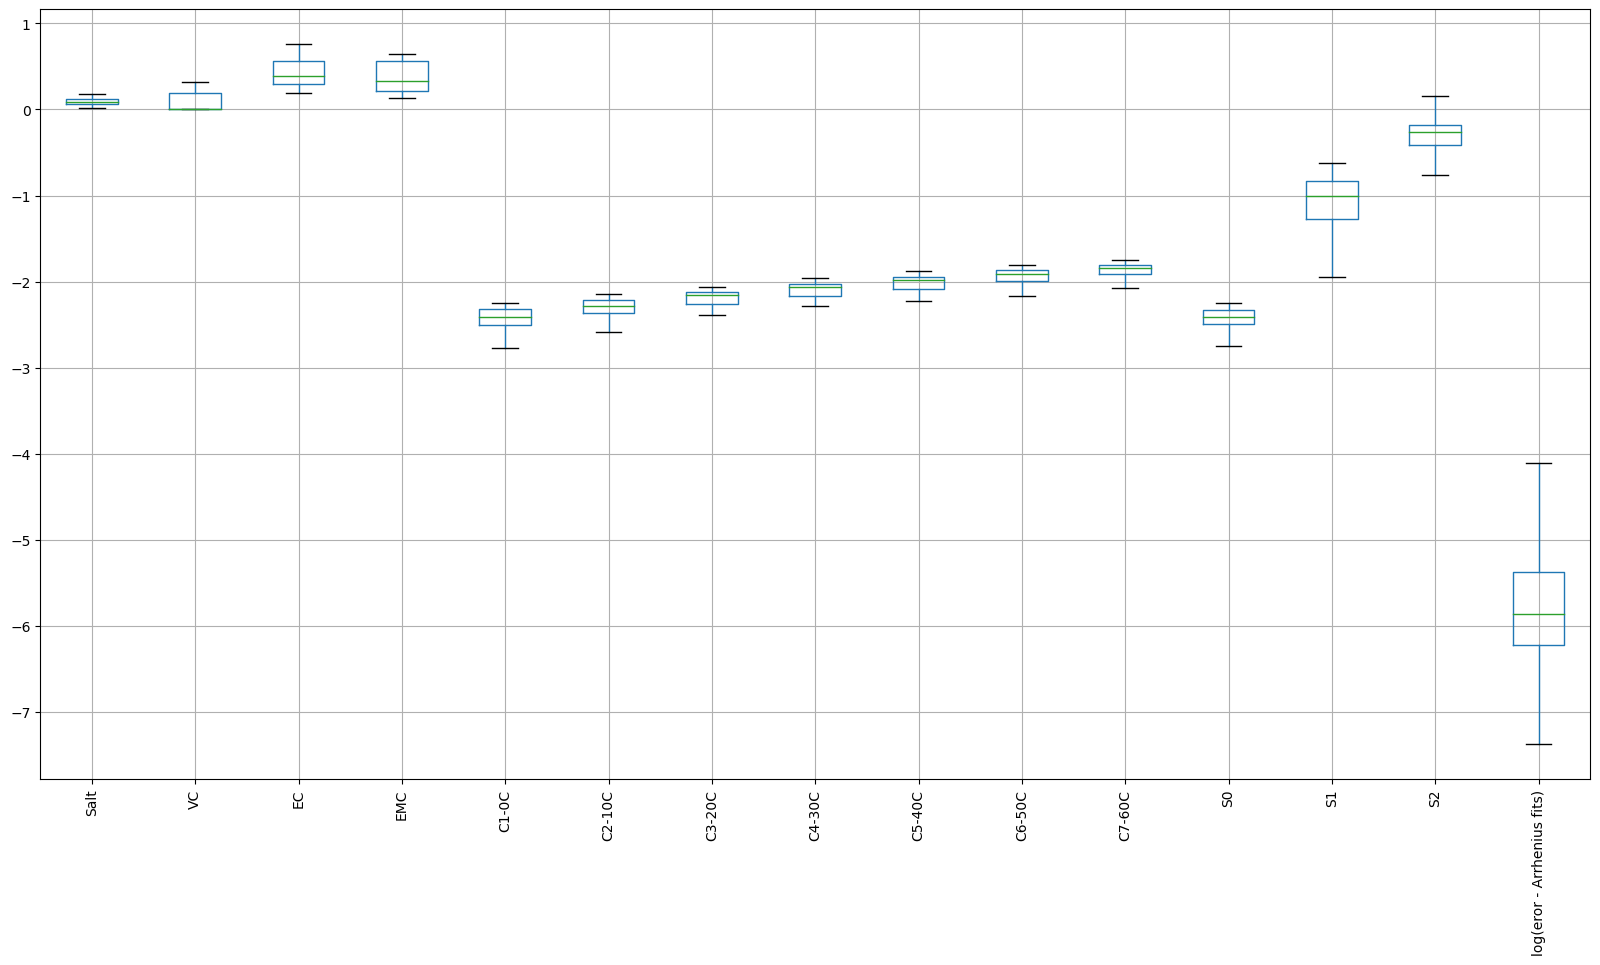

In [179]:
chemrxivDfWithoutSample.boxplot(column= chemrxivDfWithoutSample.columns.tolist(), rot = 90, figsize=(20, 10))

## Check if there is any missing values on data

In [89]:
df = pd.DataFrame(data=dataSet)

df.isnull() # True if NaN

,Sample,Salt,VC,EC,EMC,C1-0C,C2-10C,C3-20C,C4-30C,C5-40C,C6-50C,C7-60C,S0,S1,S2,log(eror - Arrhenius fits)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [90]:
df.isnull().sum() # Count of NaN

Sample                        0
Salt                          0
VC                            0
EC                            0
EMC                           0
C1-0C                         0
C2-10C                        0
C3-20C                        0
C4-30C                        0
C5-40C                        0
C6-50C                        0
C7-60C                        0
S0                            0
S1                            0
S2                            0
log(eror - Arrhenius fits)    0
dtype: int64

# Studio Activity 3: EDA (Data Analysis and Preparation)

### Identify target variable and Predicators

**Target variable:** log(eror - Arrhenius fits) \
**Predictors (Input varibles):** VC, EC, EMC, C1-0C, C2-10C, C3-20C, C4-30C, C5-40C, C6-50C, C7-60C, S0, S1, S2

### Conduct and univariate analysis for Predicators

Numerical columns - VC, EC, EMC, C1-0C, C2-10C, C3-20C, C4-30C, C5-40C, C6-50C, C7-60C, S0, S1, S2

In [185]:
import itertools

/var/folders/c6/_p5br7tn1xj6tjc5l7wfj5nw0000gn/T/ipykernel_12082/3653045410.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(chemrxivDfWithoutSample[i], color=k, rug=True)
/var/folders/c6/_p5br7tn1xj6tjc5l7wfj5nw0000gn/T/ipykernel_12082/3653045410.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

 

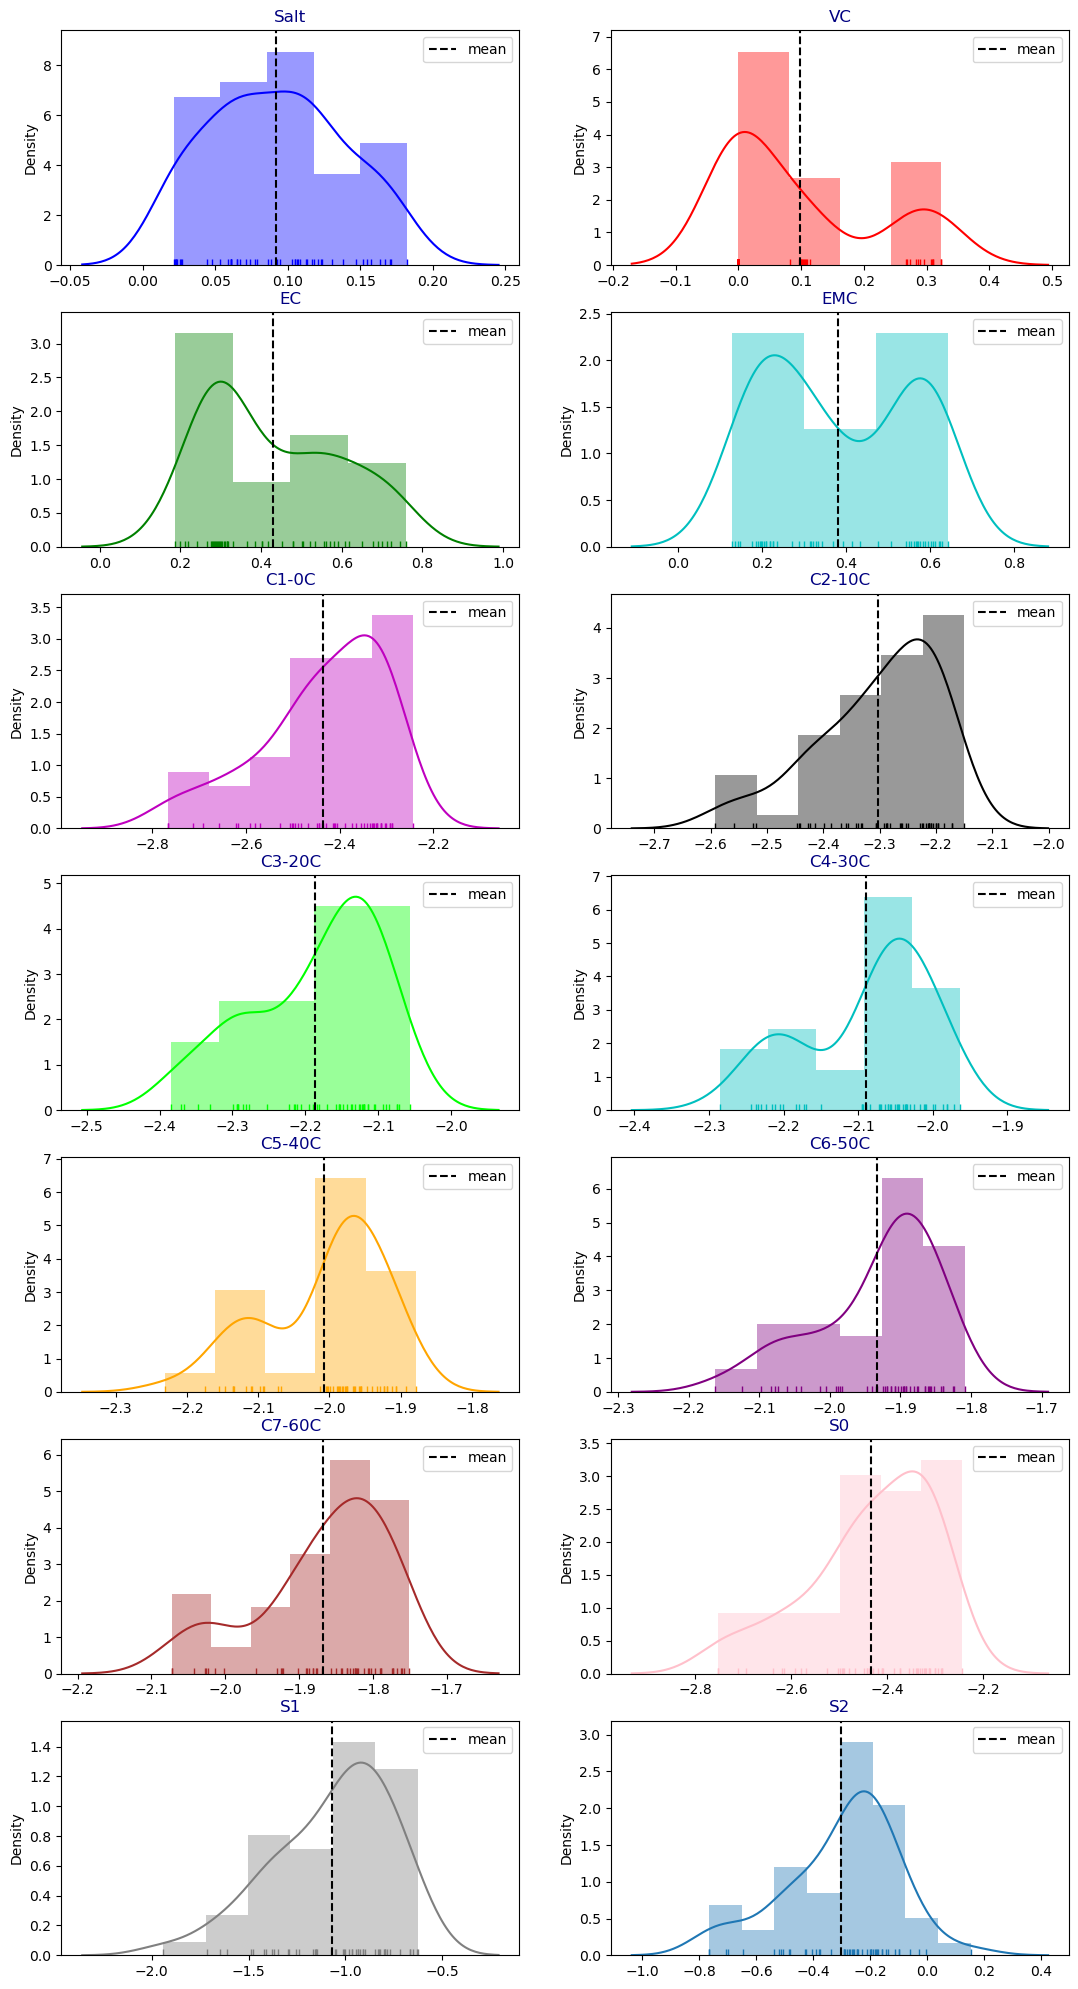

In [203]:
cols = [i for i in chemrxivDfWithoutSample.columns if i not in 'log(eror - Arrhenius fits)']
length = len(cols)
# b: Blue, r: Red, g: Green, c: Cyan, m: Magenta, k: Black, lime: Lime, c: Cyan, orange: Orange, 
# purple: Purple, brown: Brown, pink: Pink, gray: Gray:
cs = ["b", "r", "g", "c", "m", "k", "lime", "c", "orange", "purple", "brown", "pink", "gray"] 
fig = plt.figure(figsize=(13, 25))

nrows = (length // 2) + (length % 2)
ncols = 2 

for i, j, k in itertools.zip_longest(cols, range(length), cs):
    plt.subplot(nrows, ncols, j+1)
    ax = sns.distplot(chemrxivDfWithoutSample[i], color=k, rug=True)
    ax.set_facecolor("w")
    plt.axvline(chemrxivDfWithoutSample[i].mean(), linestyle='dashed', label="mean", color='k')
    plt.legend(loc="best")
    plt.title(i, color="navy")
    plt.xlabel("")

**Explain Univariate analysis:** \
\
**Salt**: Symetric distribution, mean around 0.1. Most values appear between 0 to 0.05 and 0.15 to 0.20 \
**VC**: Bimodal distribution, mean around 0.1, with peaks around 0.0-0.1 and aroud 0.3\
**EC**:  Skewed to the right, mean near 0.4\
**EMC**: Bimodal distribution, mean near 0.4\
**C1-0C**: Skewed to the left, mean near -2.4\
**C2-10C**: Skewed to the left, mean near -2.3\
**C3-20C**: Skewed slightly to the left, mean near -2.2\
**C4-30C**: Clustering, mean near -2.1\
**C5-40C**: Skewed slightly to the left, mean near -2.0\
**C6-50C**: Skewed to the left, mean near the middle between -2.0 and -1.9\
**C7-60C**: Skewed slightly to the left, mean near -1.9\
**S0**:  Skewed to the left, mean near -2.4\
**S1**: Left Skewed distribution, mean near -1.0 \
**S2**: Left Skewed distribution, mean between -0.4 and -0.2.

chemrxiv compressive log(eror - Arrhenius fits) distribution

/var/folders/c6/_p5br7tn1xj6tjc5l7wfj5nw0000gn/T/ipykernel_12082/2558272945.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(chemrxivDfWithoutSample["log(eror - Arrhenius fits)"], color='b', rug=True)


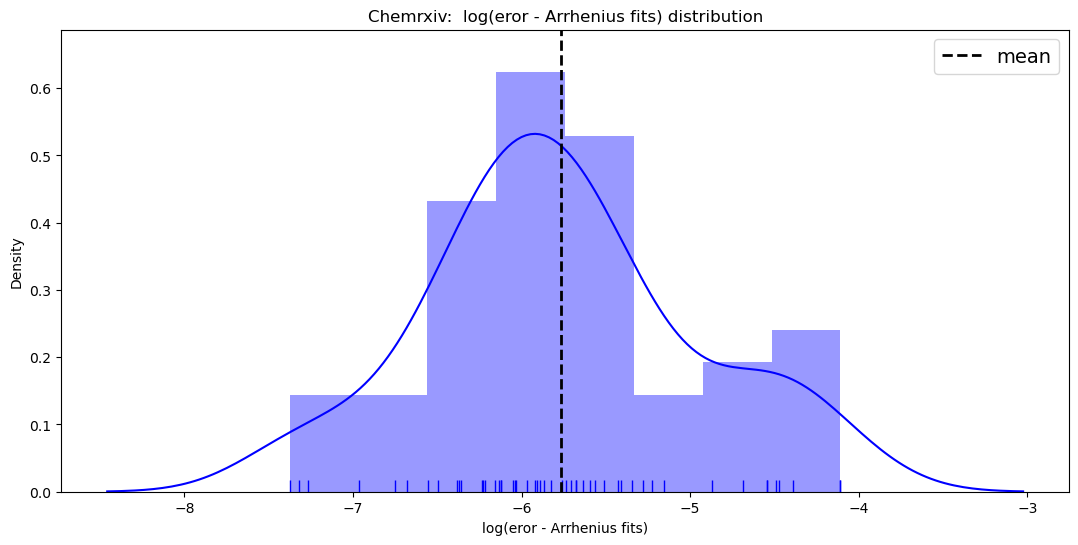

In [197]:
plt.figure(figsize=(13, 6))
sns.distplot(chemrxivDfWithoutSample["log(eror - Arrhenius fits)"], color='b', rug=True)
plt.axvline(chemrxivDfWithoutSample["log(eror - Arrhenius fits)"].mean(), linestyle="dashed", 
            label='mean', color="k", linewidth=2)
plt.legend(loc="best", prop={"size": 14})
plt.title("Chemrxiv:  log(eror - Arrhenius fits) distribution")
plt.show()


**log(eror - Arrhenius fits)** seems to be uniformly distributed

### View a summary statistic of all the variables

In [182]:
chemrxivDfWithoutSample.describe().T

,count,mean,std,min,25%,50%,75%,max
Salt,51.0,0.092167,0.046235,0.021540,0.060607,0.092580,0.122204,0.182205
VC,51.0,0.097518,0.124466,0.000000,0.000000,0.000000,0.190897,0.323792
EC,51.0,0.428944,0.168197,0.186371,0.290904,0.386015,0.565552,0.758965
EMC,51.0,0.381370,0.174942,0.128157,0.214307,0.332515,0.568041,0.642461
C1-0C,51.0,-2.435876,0.133837,-2.766349,-2.501012,-2.411623,-2.324122,-2.243821
C2-10C,51.0,-2.303383,0.108627,-2.591403,-2.364137,-2.286310,-2.212626,-2.149181
C3-20C,51.0,-2.186572,0.089113,-2.384151,-2.265057,-2.154416,-2.120299,-2.057080
C4-30C,51.0,-2.089320,0.086226,-2.285613,-2.171302,-2.060380,-2.032738,-1.963260
C5-40C,51.0,-2.006969,0.085093,-2.230726,-2.081910,-1.982487,-1.951077,-1.878845
C6-50C,51.0,-1.933392,0.086116,-2.162948,-1.987315,-1.907847,-1.870226,-1.808345


### Conduct a Multivariate analysis

/opt/miniconda3/envs/env_c_w1/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


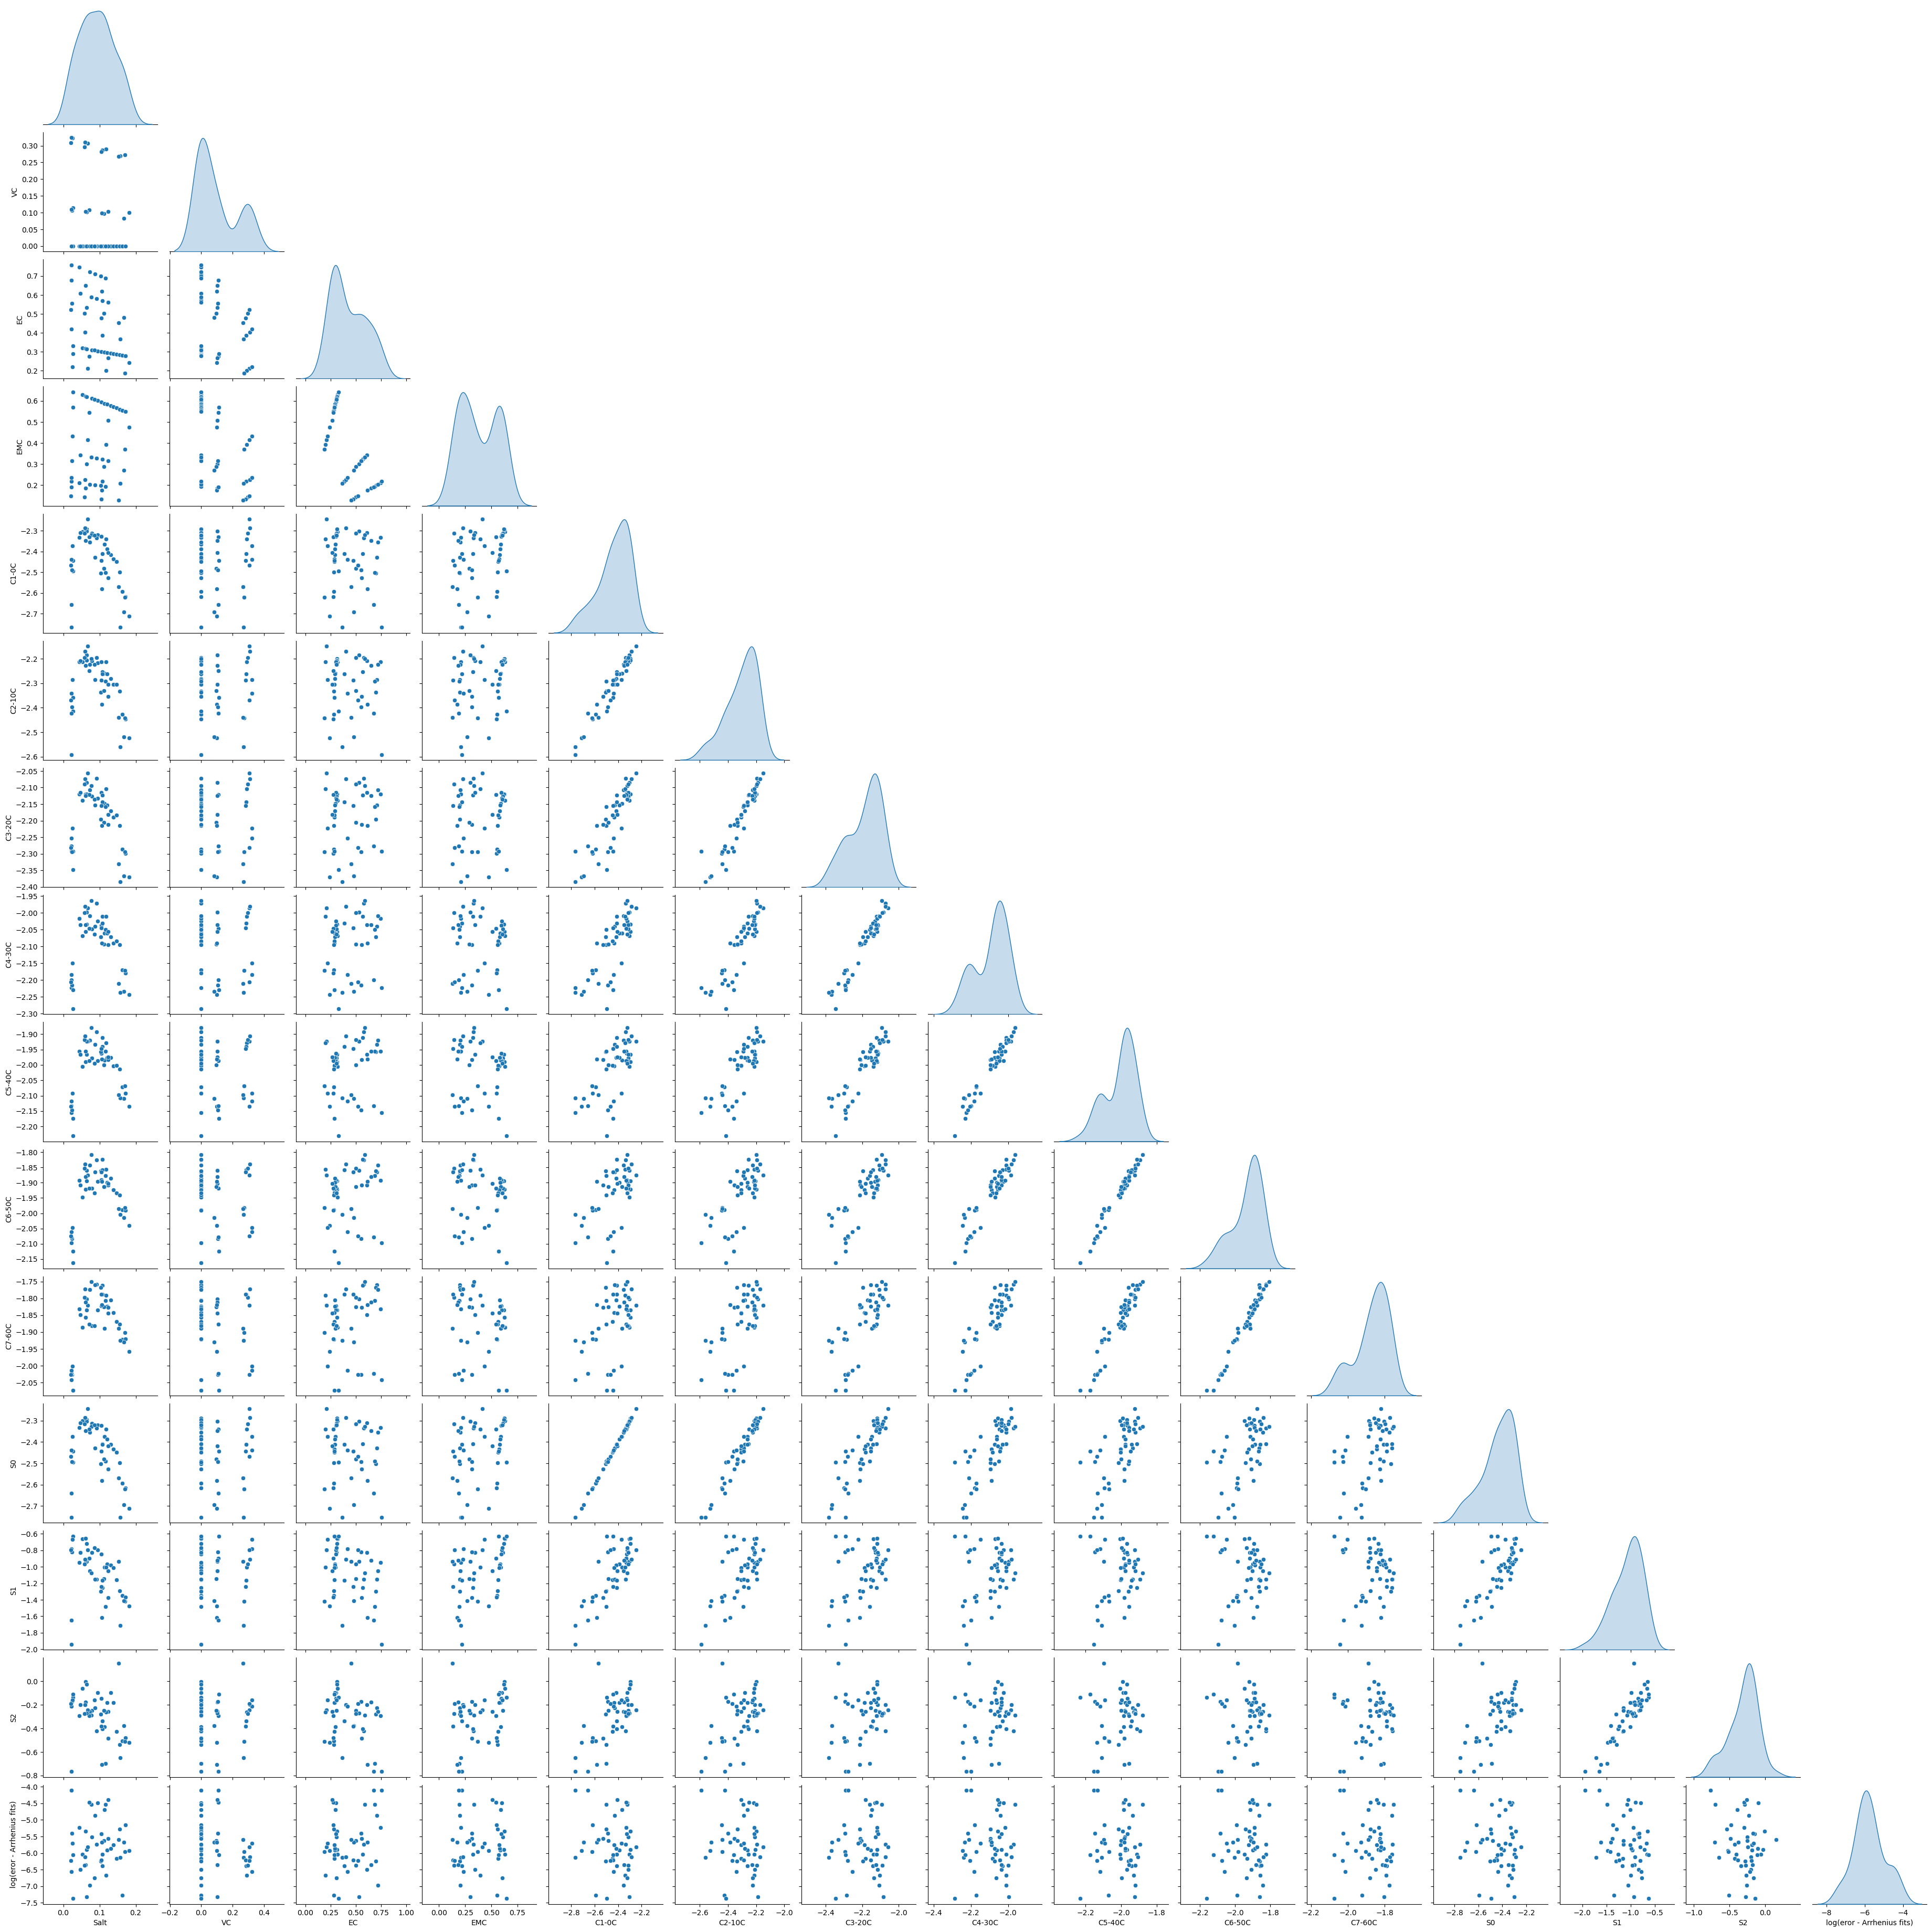

In [198]:
sns.pairplot(chemrxivDfWithoutSample, diag_kind='kde', corner=True)

### Identify pairwise correlations among the variables and plot them in a heatmap

### Study correlation

In [199]:
# Check the Correlation
chemrxivDfWithoutSample.corr()

,Salt,VC,EC,EMC,C1-0C,C2-10C,C3-20C,C4-30C,C5-40C,C6-50C,C7-60C,S0,S1,S2,log(eror - Arrhenius fits)
Salt,1.000000,-0.142056,-0.338193,0.161934,-0.417306,-0.328222,-0.265631,-0.080666,0.080453,0.211706,0.287946,-0.425329,-0.480485,-0.283131,0.007590
VC,-0.142056,1.000000,-0.201104,-0.480577,-0.007987,-0.032400,-0.083502,-0.093540,-0.083500,-0.097072,-0.107403,-0.008253,0.081485,0.074273,-0.243646
EC,-0.338193,-0.201104,1.000000,-0.728985,-0.133917,-0.050766,0.085794,0.118376,0.163558,0.159552,0.186381,-0.126884,-0.352663,-0.283033,0.148279
EMC,0.161934,-0.480577,-0.728985,1.000000,0.244727,0.158606,0.047127,-0.025941,-0.119106,-0.140287,-0.178881,0.240275,0.408079,0.294105,0.028780
C1-0C,-0.417306,-0.007987,-0.133917,0.244727,1.000000,0.972703,0.882099,0.794677,0.674820,0.584589,0.498786,0.999460,0.785930,0.637577,-0.156452
C2-10C,-0.328222,-0.032400,-0.050766,0.158606,0.972703,1.000000,0.948856,0.892787,0.798452,0.718250,0.639323,0.975456,0.643542,0.499467,-0.126298
C3-20C,-0.265631,-0.083502,0.085794,0.047127,0.882099,0.948856,1.000000,0.970222,0.901290,0.828915,0.752229,0.886422,0.409246,0.298316,-0.014962
C4-30C,-0.080666,-0.093540,0.118376,-0.025941,0.794677,0.892787,0.970222,1.000000,0.974341,0.932467,0.874627,0.796738,0.266713,0.208892,0.014411
C5-40C,0.080453,-0.083500,0.163558,-0.119106,0.674820,0.798452,0.901290,0.974341,1.000000,0.985593,0.951970,0.675737,0.123443,0.128609,-0.011027
C6-50C,0.211706,-0.097072,0.159552,-0.140287,0.584589,0.718250,0.828915,0.932467,0.985593,1.000000,0.984884,0.584534,0.044709,0.104075,-0.011923


/opt/miniconda3/envs/env_c_w1/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


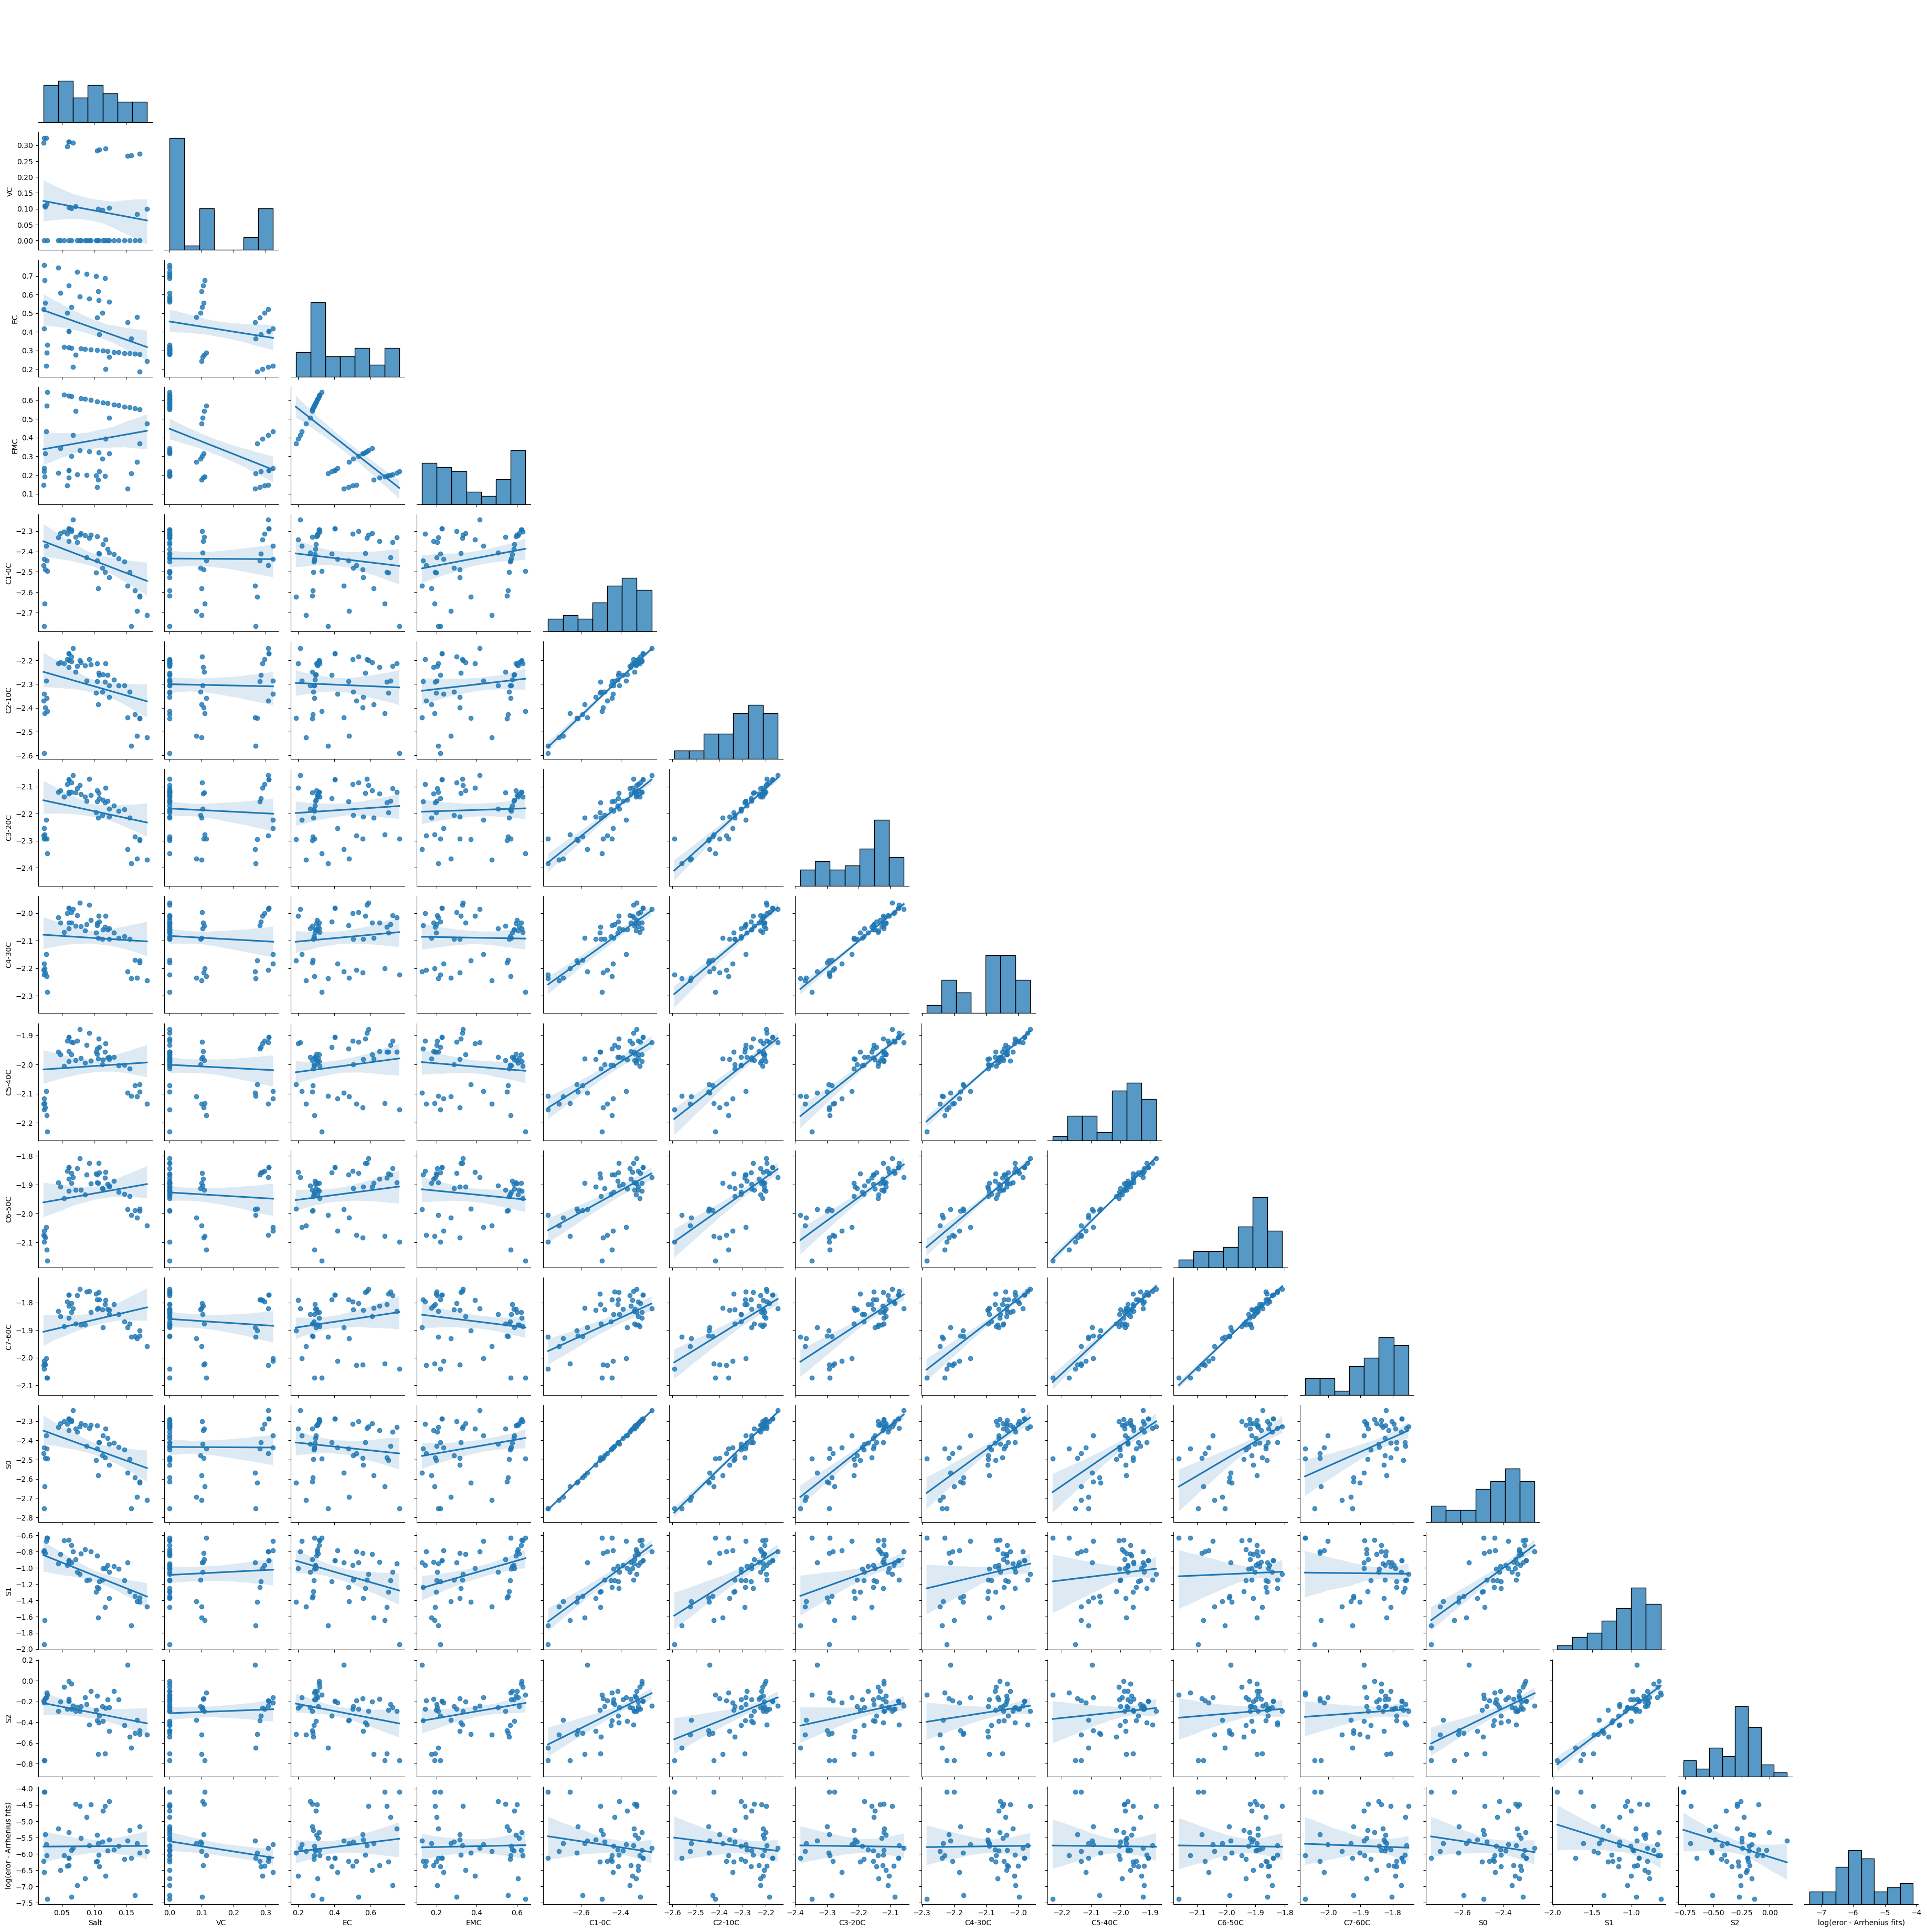

In [201]:
sns.pairplot(chemrxivDfWithoutSample[['Salt', 'VC', 'EC', 'EMC', 'C1-0C', 'C2-10C', 'C3-20C', 'C4-30C', 'C5-40C', 'C6-50C', 'C7-60C', 'S0', 'S1', 'S2', 'log(eror - Arrhenius fits)']], kind='reg', corner=True)

### Heatmap for checking the Correlation

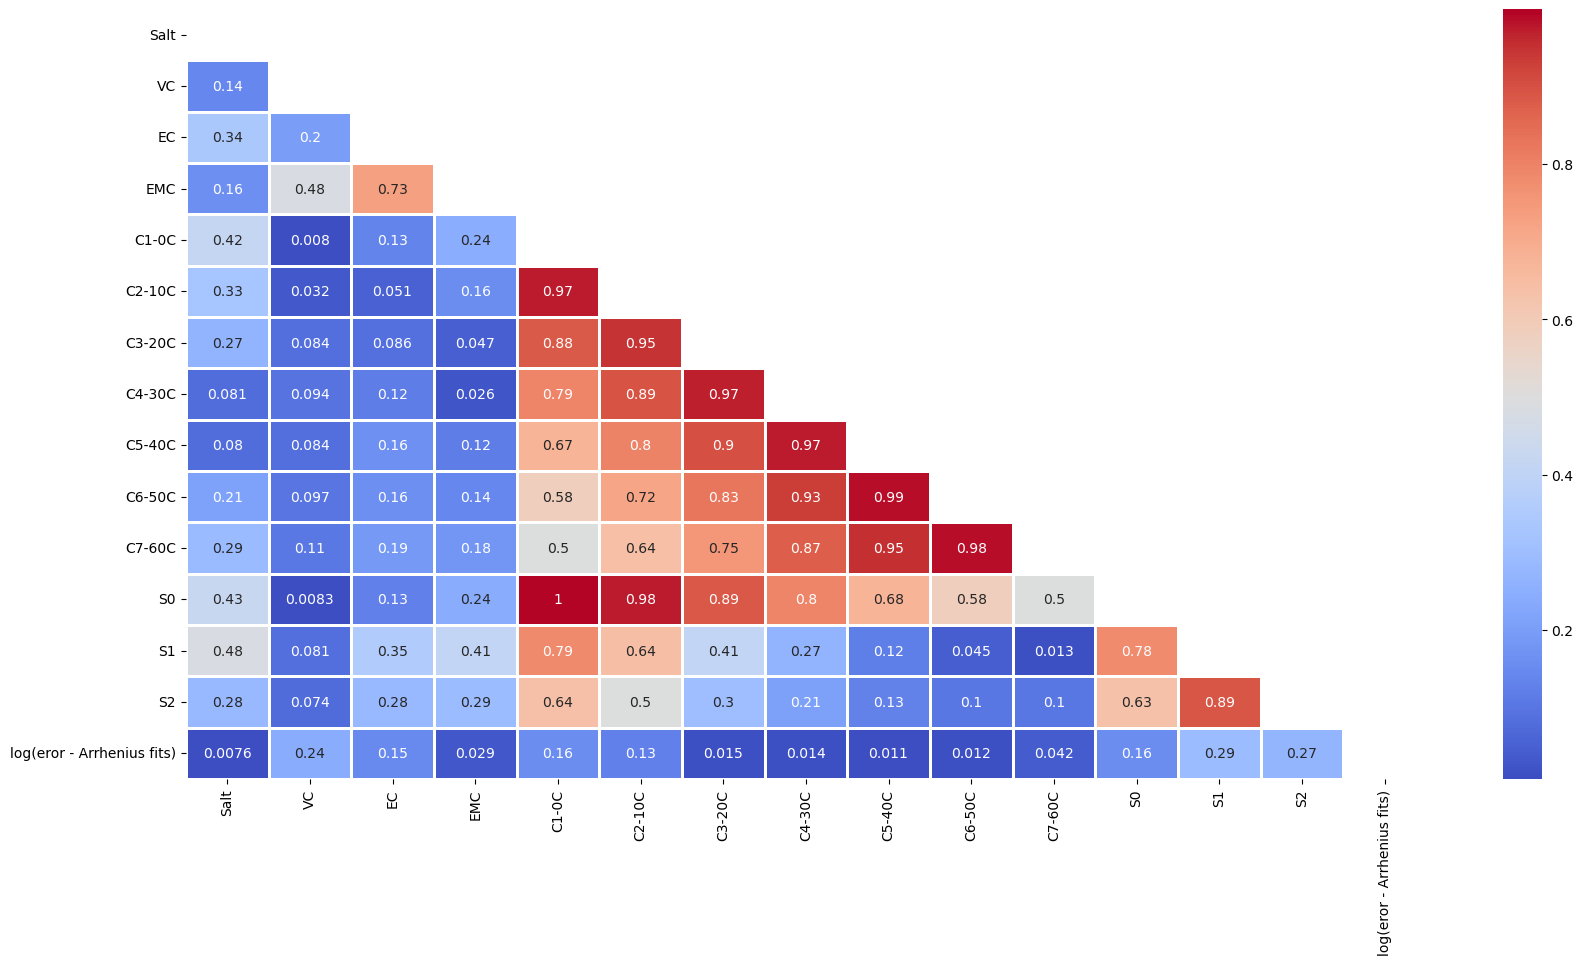

In [202]:
corr = abs(chemrxivDfWithoutSample.corr()) # Correlation matrix
lowerTriangle = np.tril(corr, k = -1) # select only the lower triangle of the correlation matrix
mask = lowerTriangle == 0 # create a mask at the upper triangle in the following heatmap
plt.figure(figsize=(20, 10))

sns.heatmap(lowerTriangle, center=0.5, cmap='coolwarm', annot=True, 
            xticklabels=corr.index, yticklabels=corr.columns, cbar=True, linewidths=1, mask=mask) # Da Heatmap
plt.show()

### Observation
* Looking at the ChemRxiv table: VC, S1, S2 are influencing the log
* Low Postiive Correlation:
    * The ChemRxiv of VC is having with S0, C1-OC
    * The ChemRxiv of EMC is having with log and C4-30C
    * The ChemRxiv of C7-60C is having with S1
* Moderate Postive Correlation:
    * The ChemRxiv of C1-OC is having with S2, C5-40C
    * The ChemRxiv of C2-10C is having with S1, C7-60C
    * The ChemRxiv of C5-40C is having with 0.68
    * The ChemRxiv of S0 is having with S2
* Negligible Correlation
    * The ChemRxiv of log is having with Salt, EMC, C3-20C, C4-30C, C5-40C, C6-50C, C7-60C


# Summary
1. Features like `Salt`, `VC`, `EC` are having weak significantly in terms of relationship with `log(error - Arrhenius fits)` feature and does not account for making statistical decision (of correlation)
2. ChemRxiv `Salt` feature is having Low Positive Correlation with `VC` and `C6-50C` features, perhaps we can create additional features such as (`Salt` + `VC`) and (`Salt` + `C6-50C`) to predict the chemrxiv
3. Range of clusters in the dataset from 2 to 6

# Class labelling for target variable / developing ground truth data

In [218]:
# Define bins and labels
bins = [-8, -7, -6, -5, -4, -3]
labels = ['Very Low', 'Low', 'Moderate', 'Strong', 'Very Strong']

# Applying class labels
chemrxivDfWithoutSample['logClass'] = pd.cut(chemrxivDfWithoutSample['log(eror - Arrhenius fits)'], bins=bins, labels=labels)

#Display
print(chemrxivDfWithoutSample[['log(eror - Arrhenius fits)', 'logClass']])

    log(eror - Arrhenius fits)  logClass
0                    -6.039789       Low
1                    -5.347156  Moderate
2                    -5.892069  Moderate
3                    -5.512638  Moderate
4                    -4.488718    Strong
5                    -5.426849  Moderate
6                    -4.687432    Strong
7                    -5.906162  Moderate
8                    -5.866529  Moderate
9                    -5.758084  Moderate
10                   -6.160863       Low
11                   -5.280984  Moderate
12                   -7.265629  Very Low
13                   -5.156776  Moderate
14                   -5.735801  Moderate
15                   -6.034978       Low
16                   -5.563150  Moderate
17                   -4.871939    Strong
18                   -6.237536       Low
19                   -4.543272    Strong
20                   -5.228022  Moderate
21                   -6.965681       Low
22                   -6.497086       Low
23              

## Printing to csv file

In [221]:
chemrxivDfWithoutSample.to_csv('converted_chemrxiv.csv', index=False)

# Feature Engineering

### Determine how many unique values at VC are there

In [225]:
uniqueLogs = chemrxivDfWithoutSample['VC'].unique()
countUniqueLogs = len(uniqueLogs)
print("How many", countUniqueLogs)
for i in range(countUniqueLogs):
    print(uniqueLogs[i])

How many 24
0.0
0.108546
0.103225
0.100083
0.307606
0.289704
0.273225
0.101654
0.096633
0.082602
0.310562
0.286128
0.268895
0.103901
0.099193
0.296476
0.282732
0.267502
0.114292
0.105917
0.108919
0.322698
0.323792
0.308579


### Normalise rest of the features other than VC using minmaxscale 

In [227]:
# Min-Max Scaling
dfMinMaxScaled = chemrxivDfWithoutSample.copy()

# apply normalization techniques except VC
for column in dfMinMaxScaled.select_dtypes(include=['number']).columns:
    if column != 'VC':
        dfMinMaxScaled[column] = (dfMinMaxScaled[column] - dfMinMaxScaled[column].min()) / (dfMinMaxScaled[column].max() - dfMinMaxScaled[column].min())

print(dfMinMaxScaled)

        Salt        VC        EC       EMC     C1-0C    C2-10C    C3-20C  \
0   0.197037  0.000000  0.230472  0.972785  0.885373  0.854223  0.752032   
1   0.246283  0.000000  0.225802  0.962604  0.904843  0.885671  0.806577   
2   0.270376  0.000000  0.223535  0.957599  0.905605  0.872499  0.806846   
3   0.358809  0.000000  0.215109  0.939357  0.868975  0.866178  0.786346   
4   0.455756  0.000000  0.205447  0.919826  0.855081  0.844933  0.771808   
5   0.519117  0.000000  0.200112  0.905974  0.841455  0.856500  0.824992   
6   0.573031  0.000000  0.195774  0.893962  0.765947  0.748308  0.720443   
7   0.620509  0.000000  0.190318  0.885204  0.721510  0.745522  0.704477   
8   0.680715  0.000000  0.184565  0.872799  0.672714  0.699339  0.653033   
9   0.725410  0.000000  0.180556  0.863301  0.634209  0.645656  0.596745   
10  0.782554  0.000000  0.174993  0.851644  0.606976  0.646938  0.613518   
11  0.830280  0.000000  0.170681  0.841533  0.508717  0.586190  0.517239   
12  0.882650

In [ ]:
# Save the file
dfMinMaxScaled.to_csv('normalised_chemrxiv.csv', index=False)

### Create 4 new composite features

In [ ]:
# Converence the matrix for the relavant features 
covFeatures = dfMinMaxScaled[['Salt', 'EC', 'EMC', 'C1-0C', 'C2-10C', 'S1', 'S2']].cov()

dfNormalized = dfMinMaxScaled.copy()

# Create new combined features based on the covariance matrix
dfNormalized['saltEC'] = covFeatures.loc['Salt', 'EC']
dfNormalized['ecEMC'] = covFeatures.loc['EC', 'EMC']
dfNormalized['c1C2'] = covFeatures.loc['C1-0C', 'C2-10C']
dfNormalized['s1S2'] = covFeatures.loc['S1', 'S2']

print (dfNormalized[['saltEC', 'ecEMC', 'c1C2', 's1S2']].head())




     saltEC     ecEMC      c1C2      s1S2
0 -0.028588 -0.072839  0.061199  0.044664
1 -0.028588 -0.072839  0.061199  0.044664
2 -0.028588 -0.072839  0.061199  0.044664
3 -0.028588 -0.072839  0.061199  0.044664
4 -0.028588 -0.072839  0.061199  0.044664


### Save newly generated 12 (1+7+4 in above step 1-3) features along with class label

In [ ]:
# Save these newly generated 12 (1+7+4 in above step 1-3) features along with class label ( as 1 to 5)
final_columns = ['logClass'] + dfMinMaxScaled.columns.tolist() + ['saltEC', 'ecEMC', 'c1C2', 's1S2']


dfFinalNormalized = dfNormalized[final_columns]

dfNormalized.to_csv('features_chemrxiv.csv', index=False)

# Feature selection

In [ ]:

dfOriginal = pd.read_csv('features_chemrxiv.csv')

# Specify the features to keep
features_to_keep = ['C5-40C', 'C7-60C', 'VC', 'EMC', 'saltEC', 'ecEMC', 'c1C2', 's1S2']

df_selected = dfNormalized[features_to_keep]

df_selected.to_csv('selected_feature_chemrxiv.csv', index=False)

# Model Development

`converted_chemrxiv.csv`

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

col_names = ['VC', 'C3-20C','C4-30C','C5-40C','C6-50C','C7-60C','S0']
# load dataset
chemrxiv = pd.read_csv("selected_feature_chemrxiv.csv", header=0, names=col_names)

feature_cols = ['VC', 'C3-20C','C4-30C','C5-40C','C6-50C','C7-60C','S0']
X = chemrxiv[feature_cols] # Features
y = chemrxiv.logClass # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

normalised_chemrxiv.csv

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

col_names = ['VC', 'C3-20C','C4-30C','C5-40C','C6-50C','C7-60C','S0']
# load dataset
chemrxiv = pd.read_csv("normalised_chemrxiv.csv", header=0, names=col_names)

feature_cols = ['VC', 'C3-20C','C4-30C','C5-40C','C6-50C','C7-60C','S0']
X = chemrxiv[feature_cols] # Features
y = chemrxiv.logClass # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Mean Squared Error for converted_chemrxiv.csv: 1.1777302045665783


features_chemrxiv.csv

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

col_names = ['Salt', 'EC', 'EMC', 'C1-0C', 'saltEC', 'ecEMC', 'c1C2', 's1S2']
# load dataset
chemrxiv = pd.read_csv("features_chemrxiv.csv", header=0, names=col_names)

feature_cols = ['Salt', 'EC', 'EMC', 'C1-0C', 'saltEC', 'ecEMC', 'c1C2', 's1S2']
X = chemrxiv[feature_cols] # Features
y = chemrxiv.logClass # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

selected_feature_chemrxiv.csv

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

col_names = ['Salt', 'EC', 'EMC', 'C1-0C']
# load dataset
chemrxiv = pd.read_csv("selected_feature_chemrxiv.csv", header=0, names=col_names)

feature_cols = ['Salt', 'EC', 'EMC', 'C1-0C']
X = chemrxiv[feature_cols] # Features
y = chemrxiv.logClass # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

selected_converted_chemrxiv.csv

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

col_names = ['C5-40C','C7-60C','VC','EMC']
# load dataset
chemrxiv = pd.read_csv("selected_converted_chemrxiv.csv", header=0, names=col_names)

feature_cols = ['C5-40C','C7-60C','VC','EMC']
X = chemrxiv[feature_cols] # Features
y = chemrxiv.logClass # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))